# Modelo lineal generalizado

La regresión lineal tradicional buscamos resolver la ecuación:

\\[
\hat{Y}=X \hat{\beta}
\\]

Encontrando el valor de $\hat{\beta}$ que mejor encaja con las muestras observadas.

En una regresión lineal hacemos las siguientes suposiciones:
1. Que la relación entre las variables sea lineal.
2. Que los errores en la medición de $X_k$ sean independientes entre sí.
3. Que los errores sigan una distribución normal de media 0 y varianza constante


### Distribución Gausiana

Es el modelo que hemos estado viendo hasta ahora. 
Su función de densidad de probabilidad es:
\\[
P(y\;|\;\mu ,\sigma )={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(y-\mu )^{2}}{2\sigma ^{2}}}}
\\]

Trataremos de encontrar una función tal que:
\\[
\mu=\hat{y}=\beta·x
\\]
manteniendo siempre la varianza $\sigma^2$ constante.

#### Interpretación de los coeficientes 

\\[
\hat y=\beta_0+\beta_1 · x_1+\beta_2 · x_2...
\\]

#### Estimador máxima verosimilitud
Se tratará de modificar los valores de $\beta$ para que la siguiente función sea máxima:
\\[
MLE=\mathcal {L}(\beta)=p(y_1,....y_n| x_1,....,x_n;\beta)=\prod_{i=1}^n {\frac { exp(-(y_i-\mu )^{2}/(2\sigma ^2) )}{\sqrt {2\pi \sigma ^{2}}}}=\prod_{i=1}^n {\frac { exp(-(y_i-x_i·\beta )^{2}/(2\sigma ^2) )}{\sqrt {2\pi \sigma ^{2}}}}
\\]
\\[
\mathcal {L}(\beta)=\mathcal {L}(\mu ,\sigma ) =\left({\frac {1}{2\pi \sigma ^{2}}}\right)^{n/2}\exp \left(-{\frac {\sum _{i=1}^{n}(y_{i}-x_i·\beta )^{2}}{2\sigma ^{2}}}\right),
\\]

Para simplificar pasamos a logaritmos:
\\[
\ln {\Big (}{\mathcal {L}}(\beta ){\Big )}=-{\frac {\,n\,}{2}}\ln(2\pi \sigma ^{2})-{\frac {1}{2\sigma ^{2}}}\sum _{i=1}^{n}(\,y_{i}-x_i·\beta \,)^{2}
\\]

Si suponemos que la **varianza es constante** (no depende de $x_i$), maximizar el estimador de máxima verosimilitud (MLE o $\mathcal {L}$ ) es equivalente a minimizar la suma de residuos al cuadrado (RSS):
\\[
RSS=\sum _{i=1}^{n}(\,y_{i}-x_i·\beta \,)^{2}
\\]
Recordemos que el error cuadrádico medio (MSE) sería:
\\[
MSE=\frac{RSS}{n}
\\]

In [6]:
set.seed(123)
x<-rep(c(-10,-5,-1,2,5,10),10)
y<-sapply(x,function(xi) rnorm(1,mean=xi*5+3,sd=10))
df<-data.frame(y,x)

In [7]:
model<-glm(data=df,formula=y~x,family=gaussian())
summary(model)


Call:
glm(formula = y ~ x, family = gaussian(), data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-20.9443   -5.6996   -0.5078    5.9563   21.3602  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.6456     1.1845   3.078  0.00318 ** 
x             5.0632     0.1817  27.866  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 84.13165)

    Null deviance: 70209.9  on 59  degrees of freedom
Residual deviance:  4879.6  on 58  degrees of freedom
AIC: 440.18

Number of Fisher Scoring iterations: 2


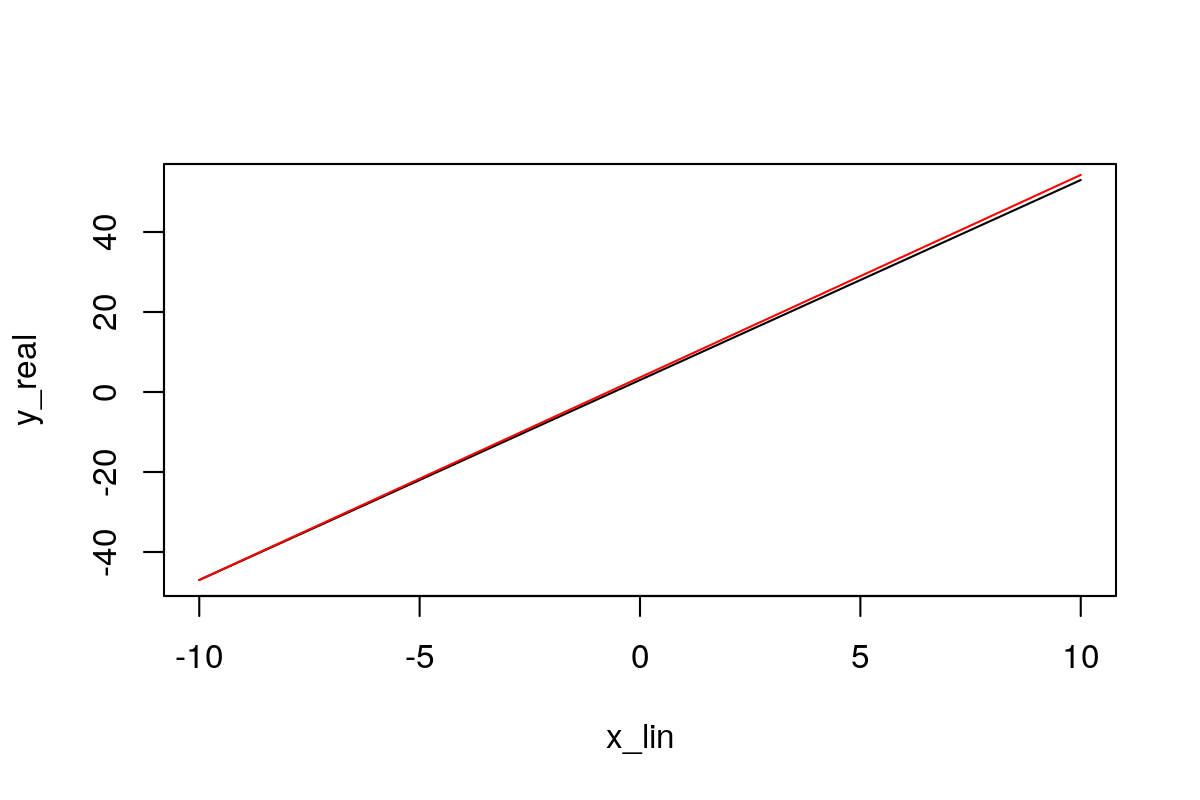

In [8]:
x_lin<-seq(-10,10,length.out = 20)
y_est<-model$coefficient[1]+model$coefficient[2]*x_lin
y_real<-5*x_lin+3

options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)

plot(x_lin,y_real,t='l')
lines(x_lin,y_est,col="red")

In [9]:
df$pred_lin  <-x*model$coefficients[2]+model$coefficients[1]
df$pred_model<-predict(model,df)

In [10]:
head(df)

,y,x,pred_lin,pred_model
,<dbl>,<dbl>,<dbl>,<dbl>
1,-52.60476,-10,-46.986848,-46.986848
2,-24.30177,-5,-21.670608,-21.670608
3,13.58708,-1,-1.417616,-1.417616
4,13.70508,2,13.772128,13.772128
5,29.29288,5,28.961871,28.961871
6,70.15065,10,54.278111,54.278111


### AIC

El criterio de información de Akaike (AIC) es un estimador de la calidad relativa del modelo que tiene en cuenta su complejidad.

A medida que se aumenta el número de parámetros de entrada o de grados de un polinomio el valor de $R^2$ va a ser mejor porque el error cuadrático medio disminuye. El AIC penaliza los modelos complejos en favor del los sencillos para evitar el sobreajuste.

Se calcula a partir del log-likelihood, el logaritmo del estimador de máxima verosimilitud:

\\[
AIC = 2·P-2·ln\left( \mathcal {L} \right)
\\]

En el caso de una regresión lineal:
\\[
\ln {\Big (}{\mathcal {L}}(\beta ){\Big )}=-{\frac {\,n\,}{2}}\ln(2\pi \sigma ^{2})-{\frac {1}{2\sigma ^{2}}}\sum _{i=1}^{n}(\,y_{i}-x_i·\beta \,)^{2}
\\]
Una vez que el modelo está entrenado, resulta que:
\\[
\sigma ^{2} = MSE = \frac{1}{n} \sum _{i=1}^{n}(\,y_{i}-x_i·\beta· \,)^{2}=n·RSS
\\]

\\[
\ln {\Big (}{\mathcal {L}}(\beta ){\Big )}=-{\frac {\,n\,}{2}}\ln \left( 2\pi \frac{RSS}{n} \right)-{\frac {n}{2·RSS}}·RSS
\\]
Si sustituimos en la ecuación de AIC:
\\[
AIC = 2·P+2·{\frac {\,n\,}{2}}\ln \left( 2\pi \frac{RSS}{n} \right)-{\frac {n}{2}}=2·P+n·\ln \left(\frac{RSS}{n} \right)-{\frac {n}{2}}+n·\ln(2\pi)
\\]
\\[
AIC = 2·P+n·\ln \left(\frac{RSS}{n} \right)+C
\\]
Como el valor de AIC realmente solo se utiliza para comparar un modelo con otro, el termino constante C se puede ignorar porque no cambia entre los modelos.
\\[
AIC = 2·P+n·\ln \left(\frac{RSS}{n} \right)
\\]
El valor P es el número de coeficientes del modelo más 1. Y el AIC suele multiplicar P por 2, pero otros valores son posibles en función del a importancia que queramos dar a los parámetros extra.

In [11]:
k_val=2
AIC(model,k=k_val)

[1] 440.1815

In [12]:
rss<-sum((model$residuals)^2)
n<-nrow(df)

In [13]:
loglik<- -n/2*log(2*pi*rss/n)-n/2

In [14]:
-2*loglik+k_val*(length(model$coefficients)+1)

[1] 440.1815

In [15]:
model$coefficients

(Intercept)           x 
   3.645632    5.063248

In [17]:
model_lin<-lm(data=df,formula=y~1)
summary(model_lin)


Call:
lm(formula = y ~ 1, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-64.14 -27.69   4.38  24.76  65.66 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    4.490      4.453   1.008    0.318

Residual standard error: 34.5 on 59 degrees of freedom


In [18]:
AIC(model_lin)

[1] 598.1667

In [19]:
rss<-sum((model_lin$residuals)^2)
n<-nrow(df)
loglik<- -n/2*log(2*pi*rss/n)-n/2
-2*loglik+2

[1] 596.1667

In [20]:
-2*loglik+2*(length(model_lin$coefficients)+1)

[1] 598.1667

In [21]:
length(model_lin$coefficients)

[1] 1

## ¿Qué ocurre cuando los errores no siguen una distribución normal?

En la ecuación anterior el valor de Y se supone que va entre $[-\infty,\infty]$, pero si tratamos de predecir un valor binario: Si/No o el número personas que circulan por una calle nos salimos de ese rango.

Es en estos casos cuando utilizamos modelos lineales generalizados. Utilizamos una función de enlace (link function) que transforma los resultados:
\\[
\hat{Y}=g^{-1}\left(X \hat{\beta}\right)
\\]
Se define como la inversa porque la función $g()$ sería:

\\[
g\left(\hat{Y}\right)=X \hat{\beta}
\\]

### Distribución bernuilli y binomial

#### Bernuilli
La distribución de Bernuilli es una distribución discreta que puede tomar dos valores uno con probabilidad $p$ y otro $q=1-p$. Se utiliza para describir sucesos que solo tienen dos posibles resultados como Si/No, 1/0 o Cara/Cruz.

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu=p \qquad
\sigma^2=p·q=p·(1-p)
\\]

La función de densidad de probabilidad se puede representar como:
\\[
f(k;p)=\left\{ 
\begin{matrix} 
p & \text{si  } k=1 \\  
1-p & \text{si  } k=0 
\end{matrix}
\right.
\\]
donde $k$ solo admite dos posibles valores $k \in \left\{0,1 \right\}$.

Esta formula también se puede expresar como:
\\[
Pr_{Bernoulli}(k)=p^k(1-p)^{1-k} \qquad k \in \left\{0,1 \right\}.
\\]

La distribución de Bernoulli es un caso especial de la **distribución binomial** con n=1.

#### Binomial

Si tenemos $n$ sucesos independientes que siguen una distribución de Bernoulli, ¿cual es la probabilidad de que $k$ sucesos sean positivos?. 

Al tener $k$ sucesos donde $k \in \left\{0,1,2,...,n \right\}$, la función será la de Bernoulli multiplicada por el coeficiente binomial que acabamos de ver:
\\[
Pr(k)=\binom{n}{k}p^k(1-p)^{n-k}
\\]

#### Función enlace - Logit

Tenemos que forzar a la regresión lineal al rango $[0,1]$. Esto lo podemos conseguir con la función con la función 
**función logística** o **sigmoide**:
\\[
p=\hat{y}=g^{-1}(x·\hat{\beta})=\frac{1}{1+e^{-x·\hat{\beta}}}
\\]
Su inversa se conoce como la función **logit**:
\\[
x·\hat{\beta}=g(\hat{y})= log \left( \frac{\hat{y}}{1-\hat{y}} \right)=log \left( \frac{p}{1-p} \right)
\\]

De donde sacábamos que la solución de la regresión lineal era el logaritmo de la razón de monomios: $log \left( \frac{p}{1-p} \right)$


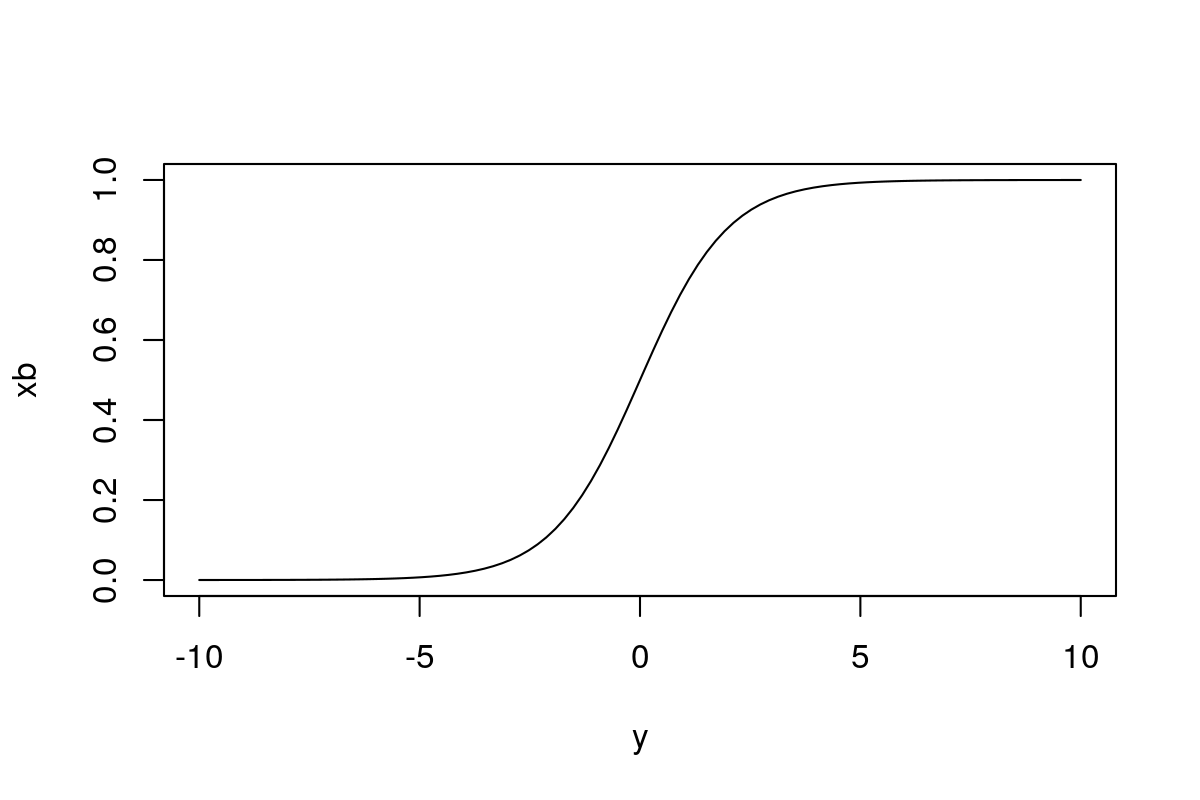

In [22]:
options(repr.plot.height=4,repr.plot.width=6)

y<-seq(-10,10,length.out = 100)
xb<-1/(1+exp(-y))
plot(y,xb,t="l")

#### Interpretación de los coeficientes 

\\[
log(Odds)=log \left(\frac{p}{1-p} \right)=\beta_0+\beta_1 · x_1+\beta_2 · x_2+...
\\]
\\[
\frac{p}{1-p}=e^{\beta_0}·e^{\beta_1 · x_1}·e^{\beta_2 · x_2}·...
\\]

#### Estimador máxima verosimilitud

##### Bernuilli
Se tratará de modificar los valores de $\beta$ para que la siguiente función sea máxima:
\\[
MLE=\mathcal {L}(\beta)=p(y_1,....y_n| x_1,....,x_n;\beta)=\prod_{i=1}^n {p^{y_{i}}(1-p)^{1-y_i}}
\\]

Para simplificar pasamos a logaritmos:
\\[
\log {\Big (}{\mathcal {L}}(\beta ){\Big )}=\sum_{i=1}^n {y_{i}·log(p)+(1-y_i)·log (1-p)}=\\
=\sum_{i=1}^n {y_{i}·log(p)-y_i·log (1-p)+log(1-p)}=\\
=\sum_{i=1}^n {y_{i}·log \left( \frac{p}{1-p} \right)+log(1-p)}=\\
=\sum_{i=1}^n {y_{i}·(\beta_0+\beta_1 · x_{i1}+\beta_2 · x_{i2}+...)+log\left(1-\frac{1}{1+e^{-(\beta_0+\beta_1 · x_{i1}+\beta_2 · x_{i2}+...)}}\right)}
\\]


##### Binomial
Se tratará de modificar los valores de $\beta$ para que la siguiente función sea máxima:
\\[
MLE=\mathcal {L}(\beta)=p(y_1,....y_n| x_1,....,x_n;\beta)=\prod_{i=1}^n \binom{n}{y_i} {p^{y_{i}}(1-p)^{1-y_i}}
\\]

Para simplificar pasamos a logaritmos:
\\[
\log {\Big (}{\mathcal {L}}(\beta ){\Big )}=\sum_{i=1}^n log \binom{n}{y_i} +{y_{i}·log(p)+(1-y_i)·log (1-p)}
\\]



#### Ejemplo Bernuillli

In [23]:
set.seed(123)
x<-rep(c(rep(0.2,3),rep(0.4,2),rep(0.1,6)),10)
y<-sapply(x,function(xi) rbinom(1,size=1,prob=xi*2+0.1))
df<-data.frame(y,x)

In [24]:
model_bernuilli<-glm(data=df,formula=y~x,family=binomial)
summary(model_bernuilli)


Call:
glm(formula = y ~ x, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1269  -0.7828  -0.7828   1.1633   1.6323  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.0851     0.4592  -4.541 5.61e-06 ***
x            10.5920     2.4896   4.255 2.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 151.18  on 109  degrees of freedom
Residual deviance: 124.20  on 108  degrees of freedom
AIC: 128.2

Number of Fisher Scoring iterations: 4


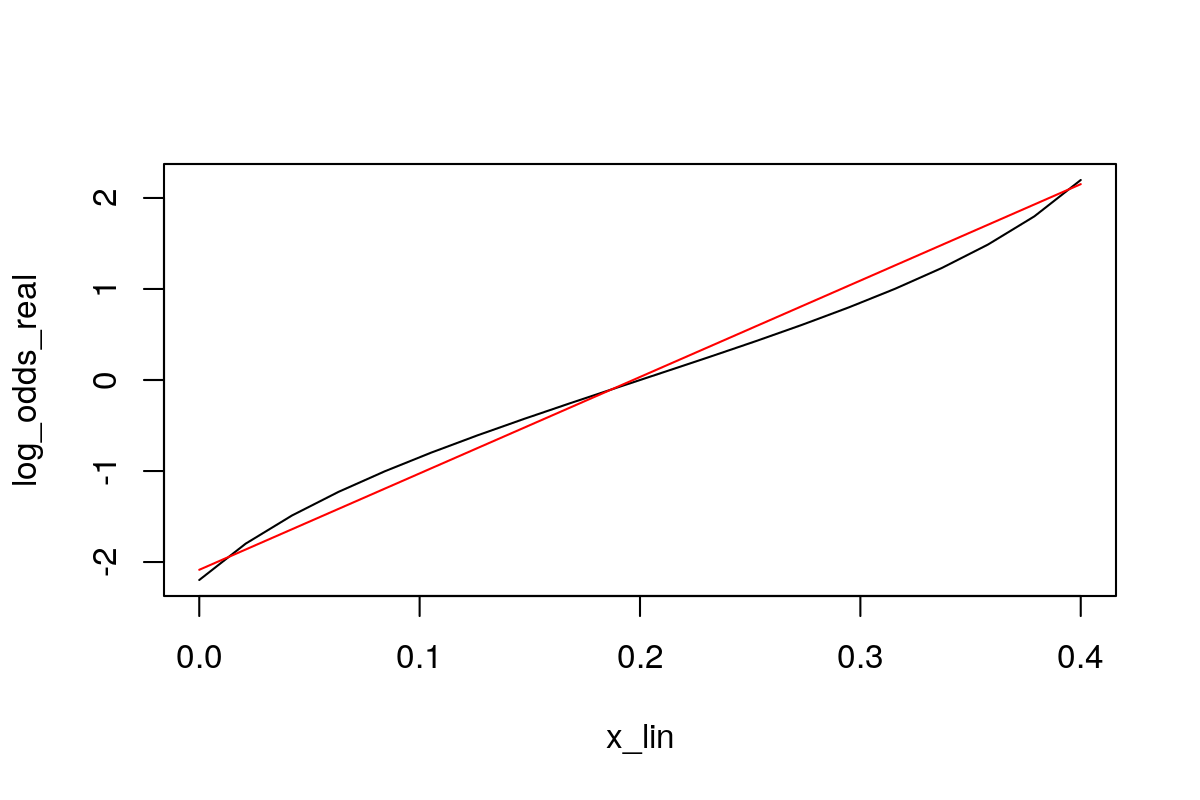

In [29]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)

x_lin<-seq(0,0.4,length.out = 20)

prob_real<-x_lin*2+0.1
log_odds_real<-log(prob_real/(1-prob_real))
plot(x_lin,log_odds_real,t='l')


log_odds_est<-model_bernuilli$coefficient[1]+model_bernuilli$coefficient[2]*x_lin
#log_odds_est<-predict(model_bernuilli,data.frame(x=x_lin))

lines(x_lin,log_odds_est,col="red")

In [30]:
exp(model_bernuilli$coefficients)

(Intercept)            x 
1.242998e-01 3.981595e+04

In [31]:
xb<-df$x*model_bernuilli$coefficients[2]+model_bernuilli$coefficients[1]
#xb<-df$x*model$coefficients[1]
df$linear_model<-xb
df$predict_result<-predict(model_bernuilli,df)
df$prob<-1/(1+exp(-xb))
#linear_model y predict_result son iguales. No son más que log(odds)

In [32]:
head(df,20)

,y,x,linear_model,predict_result,prob
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.2,0.03334548,0.03334548,0.5083356
2,1,0.2,0.03334548,0.03334548,0.5083356
3,0,0.2,0.03334548,0.03334548,0.5083356
4,1,0.4,2.15175007,2.15175007,0.8958322
5,0,0.4,2.15175007,2.15175007,0.8958322
6,0,0.1,-1.02585682,-1.02585682,0.2638881
7,0,0.1,-1.02585682,-1.02585682,0.2638881
8,1,0.1,-1.02585682,-1.02585682,0.2638881
9,0,0.1,-1.02585682,-1.02585682,0.2638881


#### Ejemplo Binomial

In [33]:
library("dplyr")
df_count<-df[,c("x","y")] %>% group_by(x) %>% summarize(succeed=sum(y), fail=sum(1-y))
df_count


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




x,succeed,fail
<dbl>,<int>,<dbl>
0.1,16,44
0.2,15,15
0.4,18,2


In [34]:
model_binom<-glm(data=df_count,formula=cbind(succeed,fail)~x,family=binomial)
summary(model_binom)


Call:
glm(formula = cbind(succeed, fail) ~ x, family = binomial, data = df_count)

Deviance Residuals: 
       1         2         3  
 0.04878  -0.09132   0.06138  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.0851     0.4592  -4.541 5.61e-06 ***
x            10.5920     2.4896   4.255 2.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26.998709  on 2  degrees of freedom
Residual deviance:  0.014486  on 1  degrees of freedom
AIC: 14.705

Number of Fisher Scoring iterations: 3


In [35]:
xb<-df_count$x*model_binom$coefficients[2]+model_binom$coefficients[1]
df_count$linear_model<-xb
df_count$predict_result<-predict(model_binom,df_count)
df_count$prob<-1/(1+exp(-xb))
df_count$prob_response<-predict(model_binom,df_count,type="response")

In [36]:
df_count

x,succeed,fail,linear_model,predict_result,prob,prob_response
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1,16,44,-1.02585682,-1.02585682,0.2638881,0.2638881
0.2,15,15,0.03334548,0.03334548,0.5083356,0.5083356
0.4,18,2,2.15175007,2.15175007,0.8958322,0.8958322


#### AIC 

El criterio de información de Akaike (AIC) es un estimador de la calidad relativa del modelo que tiene en cuenta su complejidad.
\\[
AIC = 2·P-2·ln\left( \mathcal {L} \right)
\\]

##### Bernuilli

\\[
\log {\Big (}{\mathcal {L}}(\beta ){\Big )}=\sum_{i=1}^n {y_{i}·(\beta_0+\beta_1 · x_{i1}+\beta_2 · x_{i2}+...)+log\left(1-\frac{1}{1+e^{-(\beta_0+\beta_1 · x_{i1}+\beta_2 · x_{i2}+...)}}\right)}
\\]

In [37]:
AIC(model_bernuilli,k=2)

[1] 128.1965

In [38]:
loglik<-sum(df$y*(df$x*model_bernuilli$coefficient[2]+model_bernuilli$coefficient[1]))+
sum(log(1-1/(1+exp(-(df$x*model_bernuilli$coefficient[2]+model_bernuilli$coefficient[1])))))

In [39]:
-2*loglik+2*length(model_bernuilli$coefficients)

[1] 128.1965

#### Binomial

\\[
\log {\Big (}{\mathcal {L}}(\beta ){\Big )}=\sum_{i=1}^n log \binom{n}{y_i}+\log {\Big (}{\mathcal {L}}(\beta ){\Big )}_{bernuilli}
\\]


In [40]:
AIC(model_binom,k=2)

[1] 14.70494

In [41]:
sum_binom_coef<- sum(log(apply(df_count,1,function(x) choose(x["succeed"]+x["fail"],x["succeed"]))))     
loglik_binomial<- sum_binom_coef+loglik

In [42]:
-2*loglik_binomial+2*length(model_binom$coefficients)

[1] 14.70494

In [43]:
AIC(model_bernuilli)-AIC(model_binom)
2*sum_binom_coef

[1] 113.4915

[1] 113.4915

#### Función enlace - Probit

Otra opción en lugar de usar la funcíon **logit**:
\\[
x·\hat{\beta}=g(\hat{y})= log \left( \frac{\hat{y}}{1-\hat{y}} \right)=log \left( \frac{p}{1-p} \right)
\\]

es usar la función **probit**:
\\[
x·\hat{\beta}=\Phi^{-1}(\hat{y})
\\]

Donde:

$\Phi^{-1}(\hat{y})$ es la inversa de la función acumulativa de probabilidad de una función normal de media 0 y varianza 1: $\mathcal {N}(0,1)$


De esta forma se podría considerar que la probabilidad de $y$ sigue una función normal: 
\\[
\hat{y}=\Phi(x·\hat{\beta})
\\]

Así la probabilidad de que $y=1$ es:
\\[
Pr(\hat{y_i}=1)=\Phi(x_i·\hat{\beta})
\\]
\\[
Pr(\hat{y_i}=0)=1-\Phi(x_i·\hat{\beta})
\\]



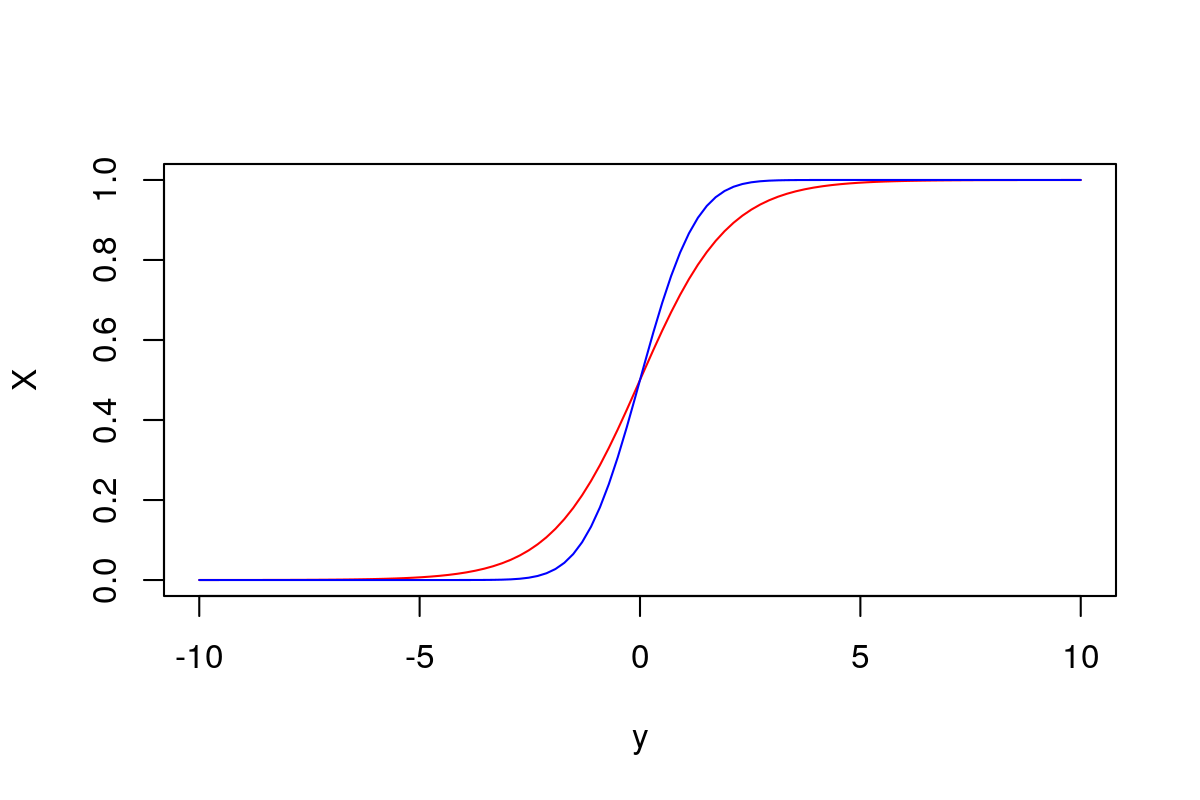

In [44]:
options(repr.plot.height=4,repr.plot.width=6)

y<-seq(-10,10,length.out = 100)
x_logit<-1/(1+exp(-y))
plot(y,x_logit,t="l",col='red',ylab='X')
x_probit<-pnorm(y)
lines(y,x_probit,t="l",col='blue')

In [45]:
set.seed(123)
x<-rep(c(rep(0.2,3),rep(0.4,2),rep(0.1,6)),10)
y<-sapply(x,function(xi) rbinom(1,size=1,prob=xi*2+0.1))
df<-data.frame(y,x)

In [46]:
model_probit<-glm(data=df,formula=y~x,family=binomial('probit'))
summary(model_probit)


Call:
glm(formula = y ~ x, family = binomial("probit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1402  -0.7859  -0.7859   1.1723   1.6281  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.2593     0.2616  -4.813 1.48e-06 ***
x             6.3345     1.3564   4.670 3.01e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 151.18  on 109  degrees of freedom
Residual deviance: 124.18  on 108  degrees of freedom
AIC: 128.18

Number of Fisher Scoring iterations: 4


In [47]:
model_logit<-glm(data=df,formula=y~x,family=binomial('logit'))
summary(model_logit)


Call:
glm(formula = y ~ x, family = binomial("logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1269  -0.7828  -0.7828   1.1633   1.6323  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.0851     0.4592  -4.541 5.61e-06 ***
x            10.5920     2.4896   4.255 2.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 151.18  on 109  degrees of freedom
Residual deviance: 124.20  on 108  degrees of freedom
AIC: 128.2

Number of Fisher Scoring iterations: 4


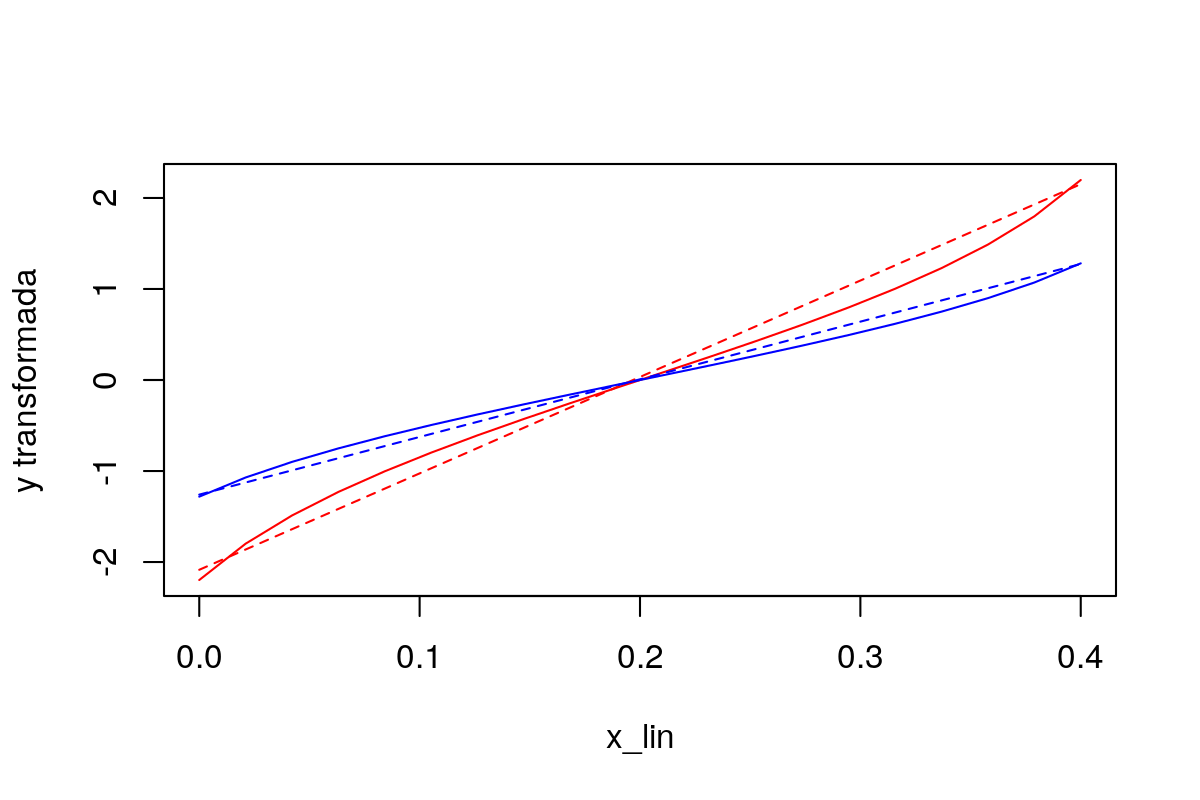

In [48]:
x_lin<-seq(0,0.4,length.out = 20)
y_est_logit<-model_logit$coefficient[1]+model_logit$coefficient[2]*x_lin # log(odds)
y_est_probit<-model_probit$coefficient[1]+model_probit$coefficient[2]*x_lin

y_real<-x_lin*2+0.1 # probability

log_odds_real<-log(y_real/(1-y_real)) #logit
plot(x_lin,log_odds_real,t='l',col='red',ylab='y transformada')
lines(x_lin,y_est_logit,col="red",lty=2)

probit=qnorm(y_real)
lines(x_lin,probit,t='l',col='blue')
lines(x_lin,y_est_probit,col="blue",lty=2)

Los coeficientes de una regresión logísitca utilizando **probit** eran fáciles de interpretar, teniendo en cuenta que la regresión lineal daba simplemente el logaritmo de la razón de monomios.
\\[
log \left(\frac{p}{1-p} \right)=\hat{y}=\beta_0+x_1·\beta_1+x_2·\beta_2+.......
\\]

Cada coeficiente (elevalo a $e$) simplemente aumenta de forma multiplicativa la razón de monomios:
\\[
\frac{p}{1-p}=e^{\beta_0}·e^{x_1·\beta_1}·e^{x_2·\beta_2}·.......
\\]


Pero en la regresión **logística** esto es más complicado, ya que los coeficientes cambian:
\\[
\Phi^{-1}(\hat{y})=\beta_0+x_1·\beta_1+x_2·\beta_2+.......
\\]
Podrían ser interpretados como la diferencia en el z-score asociado con cada unidad de diferencia en la predicción de la variable.

## Distribución Poisson

Tiene su origen en una distribución **binomial** a medida que $n \rightarrow \infty$ y $p \rightarrow 0$, manteniendo $\lambda=n·p$ constante.

Esta distribución expresa la probabilidad de que un número de eventos dado ocurra en un intervalo de tiempo 
(o espacio) fijo si los eventos curren con una frecuencia constante y son independientes 
(no dependen de cuando ocurrió el último evento).

Ejemplo: Número de llamadas que cursa una antena de telefonía móvil en una franja horaria.

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu=\lambda \qquad
\sigma^2=\lambda
\\]

Un evento puede ocurrir $k \in \left\{0,1,2,3,... \right\}$ veces en un intervalo de tiempo dado. El número de ventos que ocurre en media se define con $\lambda$. La probabilidad de observar $k$ eventos en un intervalo viene dado por la ecuación:
\\[
Pr(Y=k)=\frac{\lambda^k}{k!} e^{-\lambda}=\frac{e^{k·log(\lambda)-\lambda}}{k!} 
\\]


#### Función enlace 

En este caso la regresión lineal ha des estar en el rango $[0,\infty]$ porque no podrán existir conteos negativos. Esto lo podemos conseguir con la función con la exponencial:
\\[
\lambda=\hat{y}=g^{-1}(x·\hat{\beta})=e^{x·\hat{\beta}}
\\]
Su inversa es el **logaritmo natural o neperiano**:
\\[
x·\hat{\beta}=g(\hat{y})= log \left( \hat{y} \right)=log \left( \lambda \right)
\\]

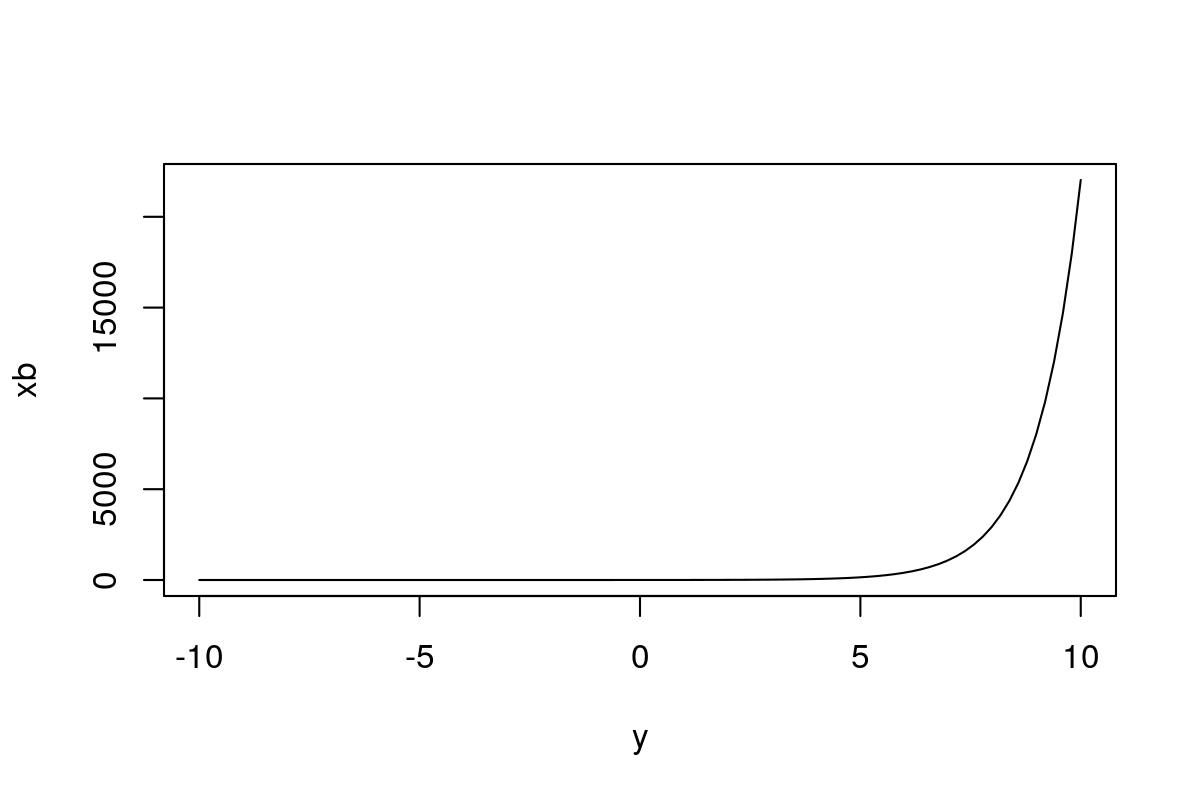

In [49]:
options(repr.plot.height=4,repr.plot.width=6)

y<-seq(-10,10,length.out = 100)
xb<-exp(y)
plot(y,xb,t="l")

#### Estimador máxima verosimilitud

Se tratará de modificar los valores de $\beta$ para que la siguiente función sea máxima:

\\[
MLE=p(y_1,....y_n| x_1,....,x_n;\beta)=\prod_{i=1}^n \frac{e^{y_i·log(\lambda)-\lambda}}{y_i!} =\prod_{i=1}^n \frac{exp(y_i·\beta·x_i-exp(\beta·x_i))}{y_i!}
\\]

Para simplificar pasamos a logaritmos:
\\[
\log {\Big (}{\mathcal {L}}(\beta ){\Big )}=\sum_{i=1}^n y_i·\beta·x_i-exp(\beta·x_i)-log(y_i!)
\\]


#### Interpretación de los coeficientes 

\\[
log \left( \lambda \right)=\beta_0+\beta_1 · x_1+\beta_2 · x_2+...
\\]
\\[
\lambda=e^{\beta_0}·e^{\beta_1 · x_1}·e^{\beta_2 · x_2}·...
\\]

* exp($\beta_0$) : Efecto de la media $\lambda$ cuando X = 0

* exp($\beta_k$) $k \in [1,m]$ : Cada incremento de unidad en $x_{k}$ tiene un efecto multiplicativo de exp($\beta_k$) en $\lambda$
    * Si $\beta_k$=0, entonces exp($\beta_k$)=1, y el valor de $\lambda$ es independiente del valor de X


In [50]:
set.seed(123)
x<-rep(c(0.1,0.01,1,2,5,6,4,3,7,8,4.5),10)
y<-sapply(x,function(xi) rpois(1,lambda=xi*2+5))
df<-data.frame(y,x)

In [51]:
head(df)

,y,x
,<int>,<dbl>
1,4,0.10
2,7,0.01
3,6,1.00
4,13,2.00
5,21,5.00
6,17,6.00


In [52]:
model_poisson<-glm(data=df,formula=y~x,family=poisson)
summary(model_poisson)


Call:
glm(formula = y ~ x, family = poisson, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6810  -0.6375  -0.1198   0.5321   2.6221  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.86399    0.05762   32.35   <2e-16 ***
x            0.15707    0.01076   14.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 333.96  on 109  degrees of freedom
Residual deviance: 112.22  on 108  degrees of freedom
AIC: 581.8

Number of Fisher Scoring iterations: 4


In [53]:
exp(model_poisson$coefficient)

(Intercept)           x 
   6.449424    1.170072

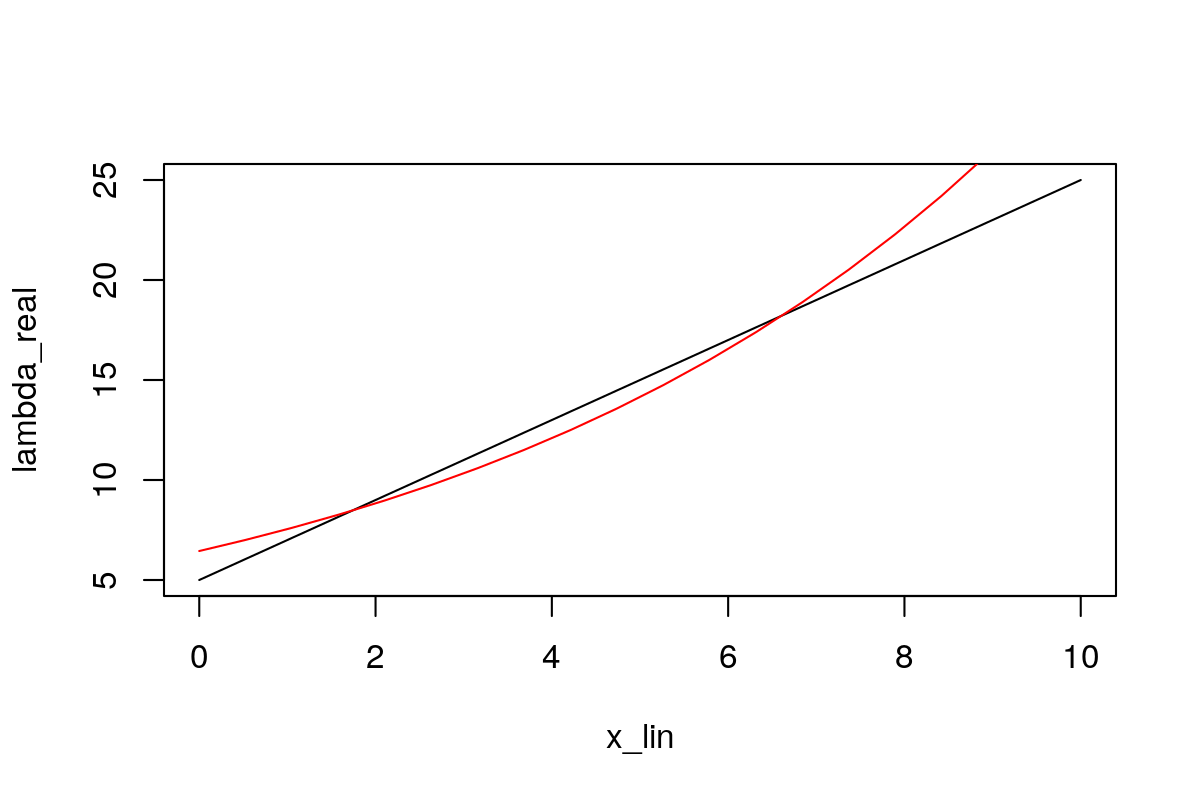

In [54]:
options(repr.plot.height=4,repr.plot.width=6)

x_lin<-seq(0,10,length.out = 20)

lambda_real<-x_lin*2+5
plot(x_lin,lambda_real,t='l')

y_est<-model_poisson$coefficient[1]+model_poisson$coefficient[2]*x_lin
lines(x_lin,exp(y_est),col="red")

In [55]:
xb<-df$x*model_poisson$coefficients[2]+model_poisson$coefficients[1]
df$linear_model<-xb
df$predict_result<-predict(model_poisson,df)
df$y_est<-exp(xb)
df$y_est_response<-predict(model_poisson,df,type="response")

In [56]:
head(df)

,y,x,linear_model,predict_result,y_est,y_est_response
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,0.10,1.879697,1.879697,6.551522,6.551522
2,7,0.01,1.865562,1.865562,6.459562,6.459562
3,6,1.00,2.021056,2.021056,7.546291,7.546291
4,13,2.00,2.178122,2.178122,8.829705,8.829705
5,21,5.00,2.649318,2.649318,14.144383,14.144383
6,17,6.00,2.806383,2.806383,16.549947,16.549947


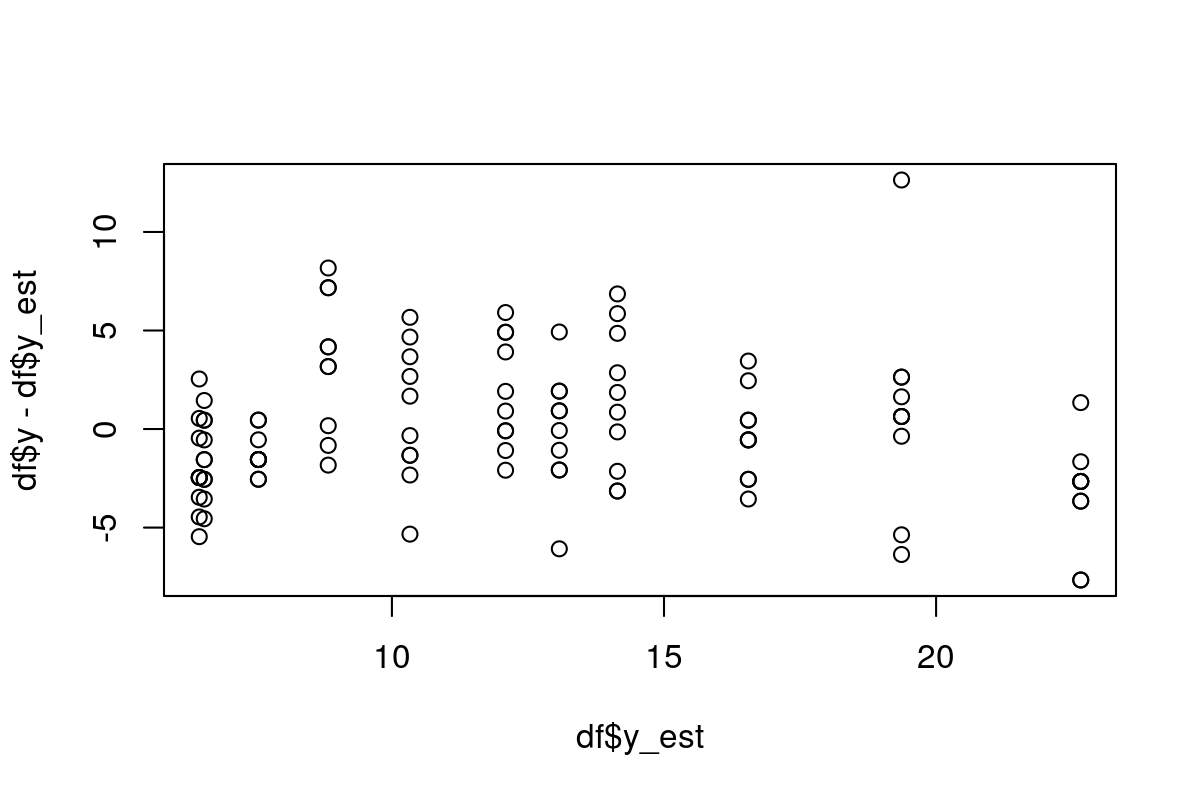

In [57]:
plot(df$y_est,df$y-df$y_est)

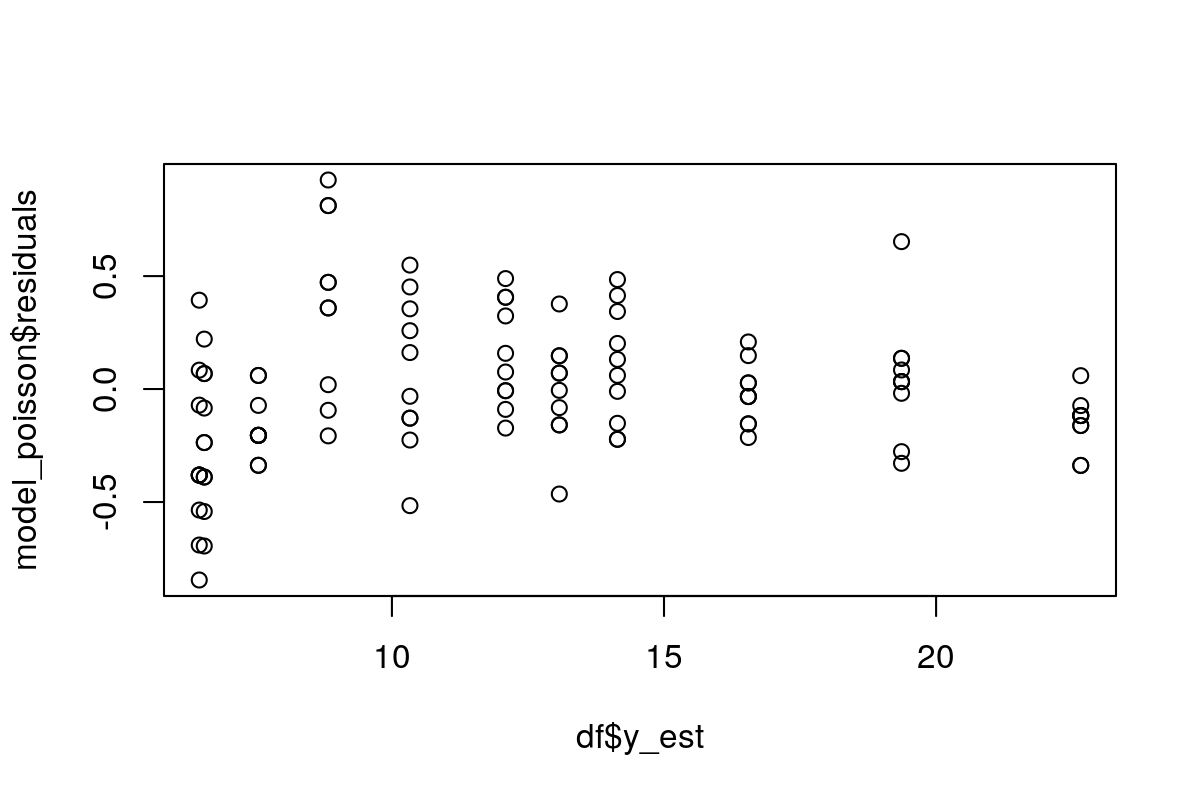

In [58]:
plot(df$y_est,model_poisson$residuals)

In [59]:
residuals(model_poisson)

1           2           3           4           5           6 
-1.07509067  0.20977336 -0.58397050  1.31031749  1.69922632  0.11013226 
          7           8           9          10          11          12 
 0.25897551  1.63084019  0.36657553 -1.71526245 -1.84497186  0.54676352 
         13          14          15          16          17          18 
-0.18302867  0.16354718  2.43567852  0.48315886  0.11013226 -0.61935472 
         19          20          21          22          23          24 
 1.35966188  0.58600913 -0.56988984 -0.59042007 -1.55452039 -1.04162706 
         25          26          27          28          29          30 
-0.58397050 -0.28377616 -0.87033042 -0.13594240  1.07131263 -0.10365920 
         31          32          33          34          35          36 
-1.53892506 -1.71526245 -0.30181063 -2.08730531 -1.04162706 -0.98812929 
         37          38          39          40          41          42 
 1.01106446 -0.03845606  0.82089521 -0.02547703  0.50601915  2.62215022 
         43          44          45          46          47          48 
-0.79069074 -0.59042007  0.17327034 -2.05656678 -0.58397050  2.16387578 
         49          50          51          52          53          54 
 1.22612364 -0.90698508 -0.31794646 -0.42362667  0.58600913 -0.56988984 
         55          56          57          58          59          60 
 0.25257810 -0.63281067  0.94289925 -0.20133939  1.31031749  1.46470262 
         61          62          63          64          65          66 
-0.13594240  1.58405997 -1.84534318 -1.28308839 -0.35270203  0.51973714 
         67          68          69          70          71          72 
-1.07509067 -1.52231037 -0.58397050  2.16387578 -0.87033042  0.58823891 
         73          74          75          76          77          78 
 1.33027097  0.79787548  0.14360590  0.27921094 -0.02106083 -0.63281067 
         79          80          81          82          83          84 
-2.68104481 -0.98812929  1.01106446 -0.58557963 -0.64403266 -0.02547703 
         85          86          87          88          89          90 
-0.75554988 -0.08312279 -0.56988984  0.25257810 -0.21860695 -1.04162706 
         91          92          93          94          95          96 
-0.58397050  0.05712717  0.73567787 -0.13594240  0.53617701  1.08219842 
         97          98          99         100         101         102 
 0.14360590 -0.79069074  1.28735953  0.17327034 -1.04162706  0.16354718 
        103         104         105         106         107         108 
-0.63910050  0.22526548 -0.64403266  1.33027097 -0.42362667  0.14360590 
        109         110 
-0.56988984  0.51973714

### Exponencial

Describe el tiempo que transcurre entre dos eventos que siguen una distribución de Poisson. Es decir, dado un proceso que produce eventos a de forma continua e independiente a una tasa constante, el tiempo entre dos eventos vendrá dado por una distribución exponencial.

Ejemplo: Tiempo entre dos llamadas consecutivas que llegan a una antena de telefonía móvil en una franja horaria.

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu=\lambda^{-1} \qquad
\sigma^2=\lambda^{-1}
\\]

**Función de densidad de probabilidad**

\\[
f(y;p)= \left\{ 
\begin{matrix} 
\lambda e^{-\lambda y}=\frac{1}{\mu} e^{-\frac{y}{\mu}}  & \text{si  } y \geq 0 \\  
0 & \text{si  } y<0 
\end{matrix}
\right.
\\]

#### Función enlace 

En este caso la regresión lineal ha des estar en el rango $[0,\infty]$ porque no podrán existir conteos negativos. Esto lo podemos conseguir con la función con la exponencial:
\\[
\mu=\hat{y}=g^{-1}(x·\hat{\beta})=-\left( x·\hat{\beta} \right)^{-1}
\\]
Su inversa es el **logaritmo natural o neperiano**:
\\[
x·\hat{\beta}=g(\hat{y})=g(\mu)=-\frac{1}{\mu}
\\]

#### Estimador máxima verosimilitud

Se tratará de modificar los valores de $\beta$ para que la siguiente función sea máxima:

\\[
MLE=p(y_1,....y_n| x_1,....,x_n;\beta)=\prod_{i=1}^n \frac{1}{\mu} exp(-y·\mu^{-1})=\prod_{i=1}^n x_i·\beta· exp(-x_i·\beta·y_i)
\\]

Para simplificar pasamos a logaritmos:
\\[
\log {\Big (}{\mathcal {L}}(\beta ){\Big )}=\sum_{i=1}^n x_i·\beta·y_i-log(x_i·\beta)
\\]

In [60]:
set.seed(123)
x<-rep(c(0.1,0.01,1,2,5,6,4,3,7),10)
y<-sapply(x,function(xi) rexp(1,rate=xi*2+5))
df<-data.frame(y,x)

In [61]:
head(df)

,y,x
,<dbl>,<dbl>
1,0.162203319,0.10
2,0.114862604,0.01
3,0.189864981,1.00
4,0.003508595,2.00
5,0.003747398,5.00
6,0.018617719,6.00


In [63]:
?family

In [62]:
model_exp<-glm(data=df,formula=y~x,family=Gamma)
summary(model_exp)


Call:
glm(formula = y ~ x, family = Gamma, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3305  -0.9801  -0.1933   0.3416   2.8746  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2432     0.9072   4.677 1.04e-05 ***
x             2.0788     0.4656   4.465 2.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 1.015371)

    Null deviance: 113.797  on 89  degrees of freedom
Residual deviance:  88.742  on 88  degrees of freedom
AIC: -218.78

Number of Fisher Scoring iterations: 6


In [64]:
exp(model_exp$coefficient)

(Intercept)           x 
  69.630529    7.994931

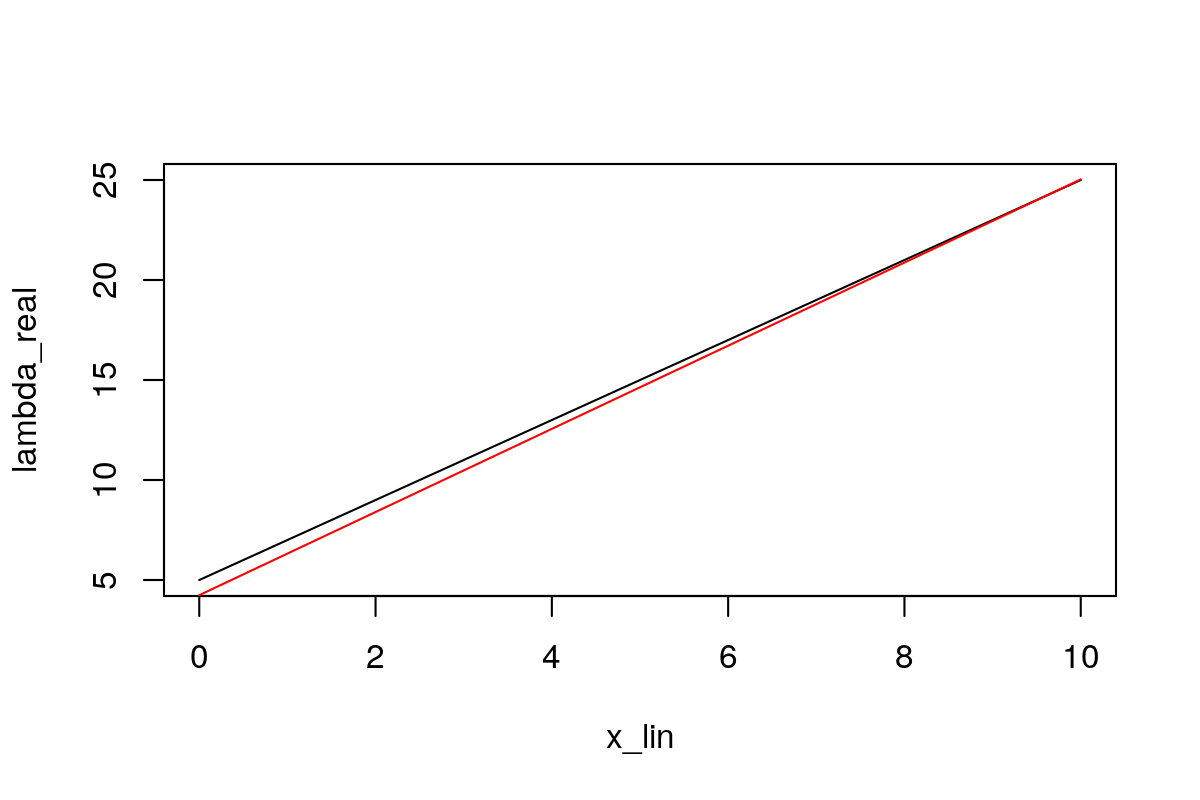

In [65]:
x_lin<-seq(0,10,length.out = 20)
y_est<-model_exp$coefficient[1]+model_exp$coefficient[2]*x_lin

lambda_real<-x_lin*2+5
plot(x_lin,lambda_real,t='l')
lines(x_lin,y_est,col="red")

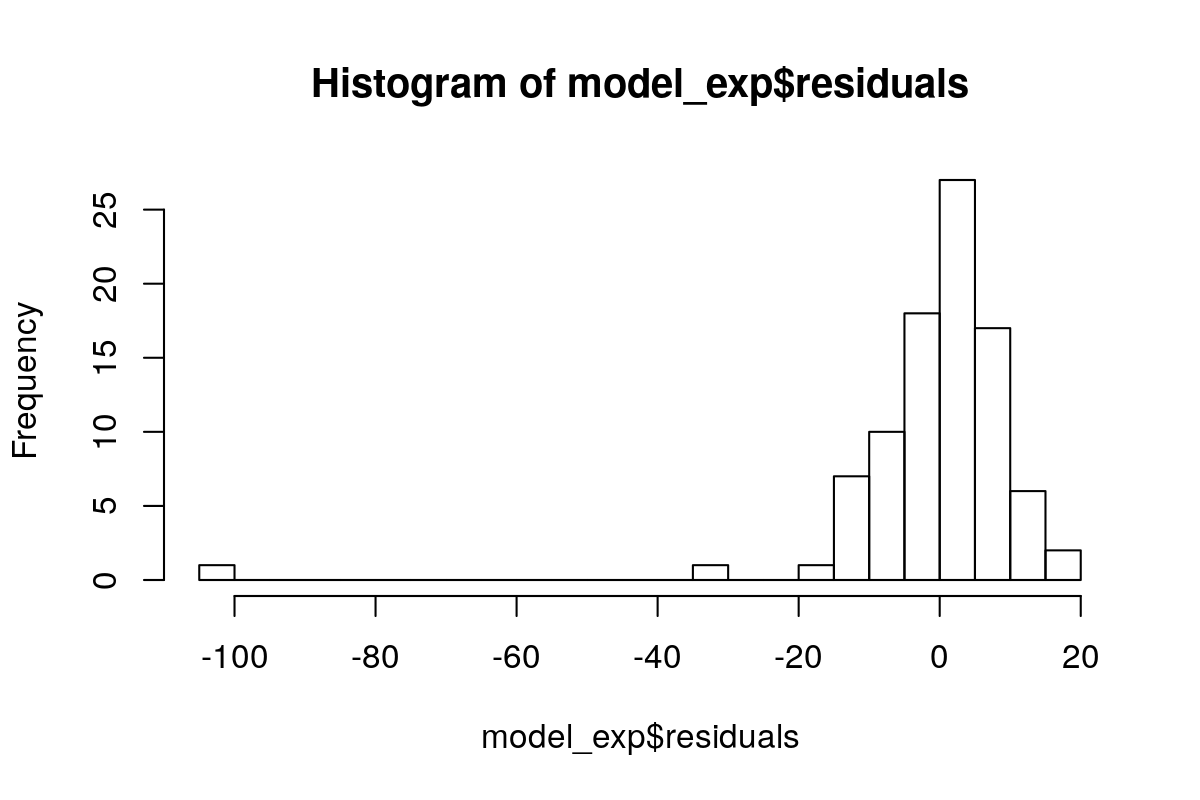

In [66]:
hist(model_exp$residuals,breaks=30)

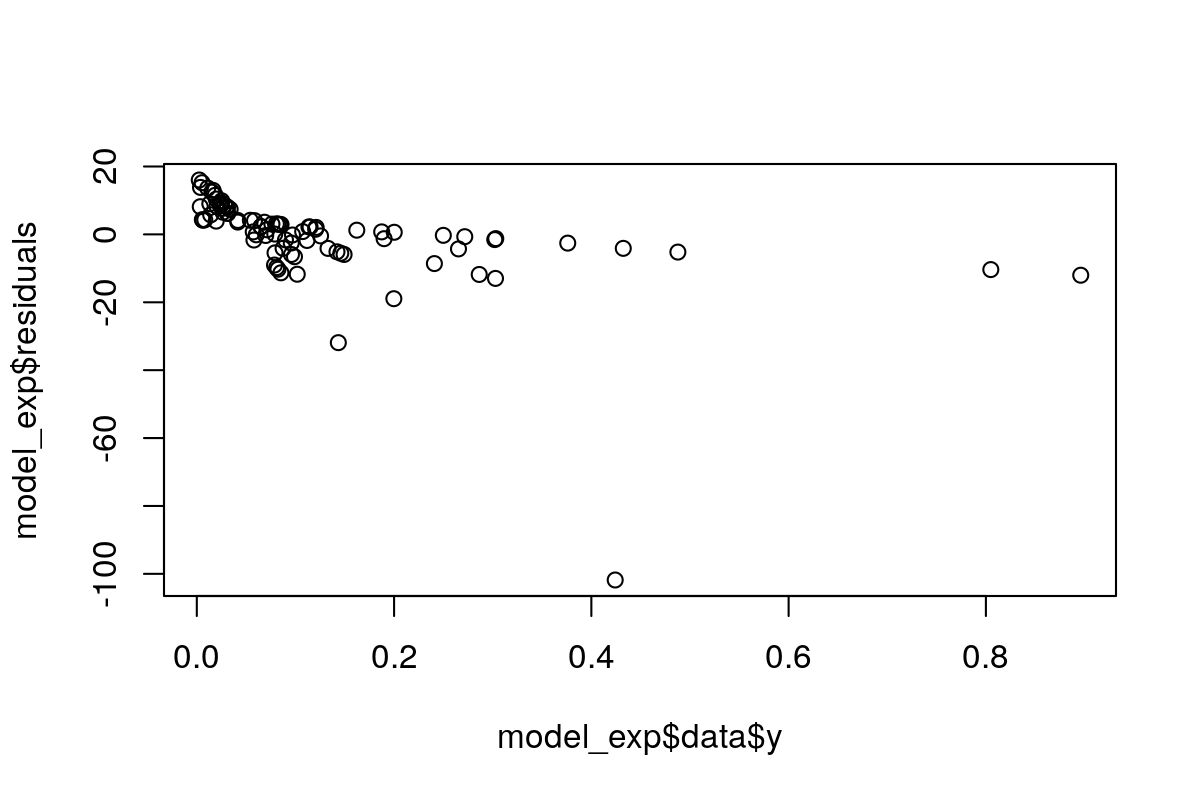

In [67]:
plot(model_exp$data$y,model_exp$residuals)

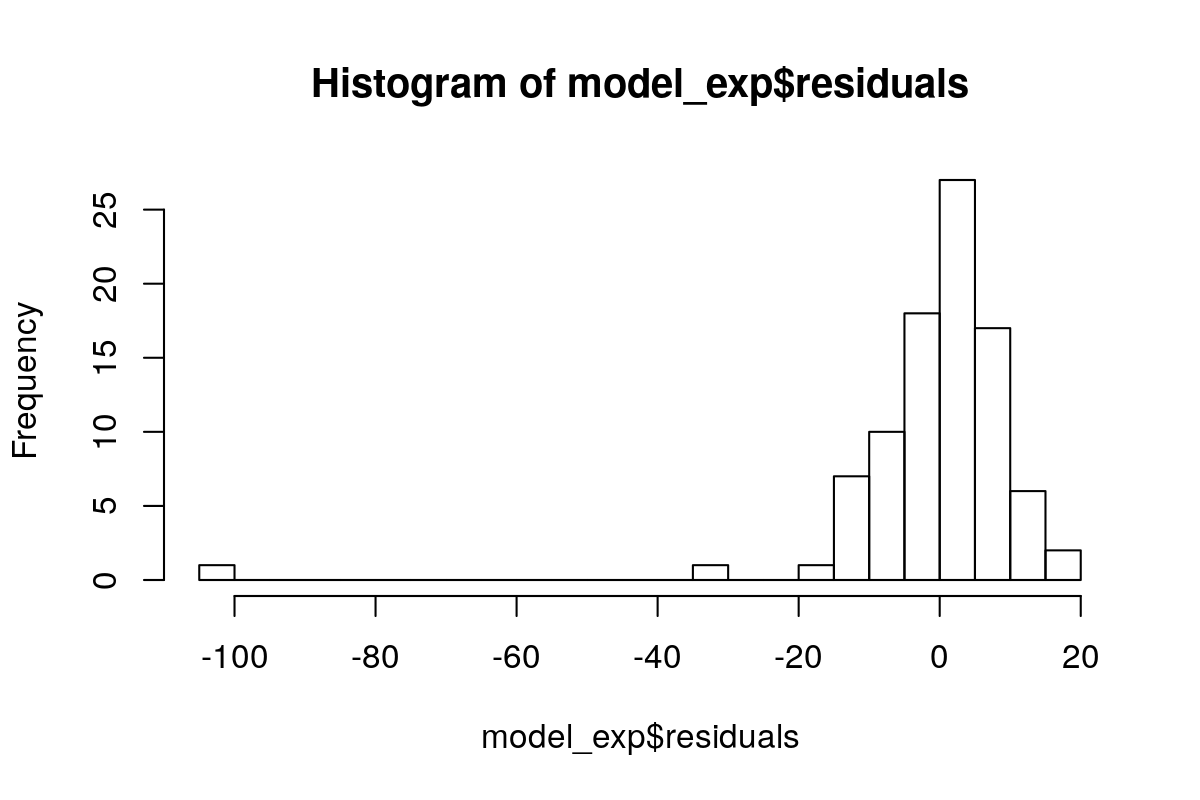

In [68]:
hist(model_exp$residuals,breaks=30)

## Ejemplo:

Accidentes de tráfico. Datos desde 2009 hasta 2016
-   Accidentes por distrito y con víctimas

https://datos.madrid.es/

In [69]:
accidentes<-read.csv('data//Accidentes_Madrid.csv')

In [70]:
head(accidentes)

,Año,X2016,X2016.1,X2015,X2015.1,X2014,X2014.1,X2013,X2013.1,X2012,X2012.1,X2011,X2011.1,X2010,X2010.1,X2009,X2009.1
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,DISTRITO_ACCIDENTE,Nº Accidentes,Nº Accidentes con víctimas,Nº Accidentes,Nº Accidentes con víctimas,Nº Accidentes,Nº Accidentes con víctimas,Nº Accidentes,Nº Accidentes con víctimas,Nº Accidentes,Nº Accidentes con víctimas,Nº Accidentes,Nº Accidentes con víctimas,Nº Accidentes,Nº Accidentes con víctimas,Nº Accidentes,Nº Accidentes con víctimas
2,ARGANZUELA,610,509,600,503,616,491,631,460,631,457,654,453,690,477,722,454
3,BARAJAS,213,164,185,146,146,121,150,121,159,123,171,131,135,112,188,120
4,CARABANCHEL,725,574,725,577,714,584,709,542,718,561,726,553,696,522,807,575
5,CENTRO,932,713,929,742,939,693,926,625,917,667,1007,657,1007,668,981,646
6,CHAMARTIN,904,756,904,775,838,670,844,648,841,653,888,687,858,682,908,705


In [71]:
acc_tmp<-t(accidentes)
acc_tmp[1,]

[1] "DISTRITO_ACCIDENTE"             "ARGANZUELA                    "
 [3] "BARAJAS                       " "CARABANCHEL                   "
 [5] "CENTRO                        " "CHAMARTIN                     "
 [7] "CHAMBERI                      " "CIUDAD LINEAL                 "
 [9] "FUENCARRAL-EL PARDO           " "HORTALEZA                     "
[11] "LATINA                        " "MONCLOA-ARAVACA               "
[13] "MORATALAZ                     " "PUENTE DE VALLECAS            "
[15] "RETIRO                        " "SALAMANCA                     "
[17] "SAN BLAS                      " "TETUAN                        "
[19] "USERA                         " "VICALVARO                     "
[21] "VILLA DE VALLECAS             " "VILLAVERDE                    "

In [72]:
nrow(acc_tmp[2:nrow(acc_tmp),])

[1] 16

In [73]:
accidentes_t=data.frame(acc_tmp[2:nrow(acc_tmp),])
colnames(accidentes_t)<-c("tipo",acc_tmp[1,2:ncol(acc_tmp)])
accidentes_t$anyo<-as.numeric(substr(rownames(accidentes_t),2,6))
rownames(accidentes_t)<-NULL

library(plyr)
accidentes_t$tipo<-revalue(accidentes_t$tipo, c("Nº Accidentes"="Total", "Nº Accidentes con víctimas"="victimas"))
head(accidentes_t)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




,tipo,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTIN,CHAMBERI,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,⋯,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS,TETUAN,USERA,VICALVARO,VILLA DE VALLECAS,VILLAVERDE,anyo
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Total,610,213,725,932,904,647,787,692,472,⋯,811,647,951,501,653,412,161,295,336,2016
2,victimas,509,164,574,713,756,554,651,584,392,⋯,643,560,797,444,567,323,135,257,262,2016
3,Total,600,185,725,929,904,657,761,639,440,⋯,751,601,849,495,636,387,151,255,298,2015
4,victimas,503,146,577,742,775,564,613,536,369,⋯,584,519,690,426,544,310,125,206,242,2015
5,Total,616,146,714,939,838,697,757,644,410,⋯,706,621,981,543,645,409,158,272,288,2014
6,victimas,491,121,584,693,670,590,588,545,343,⋯,563,513,746,462,543,316,126,229,241,2014


In [74]:
library(reshape2)

In [75]:
library(dplyr)

In [76]:
df_acc<-melt(data=accidentes_t,id.vars=c("anyo","tipo"))
df_acc$value<-as.numeric(df_acc$value)

df_acc<-df_acc %>% dplyr::rename(distrito=variable)
df_acc$distrito=factor(trimws(df_acc$distrito))
head(df_acc)

Warning message:
“attributes are not identical across measure variables; they will be dropped”


,anyo,tipo,distrito,value
,<dbl>,<fct>,<fct>,<dbl>
1,2016,Total,ARGANZUELA,610
2,2016,victimas,ARGANZUELA,509
3,2015,Total,ARGANZUELA,600
4,2015,victimas,ARGANZUELA,503
5,2014,Total,ARGANZUELA,616
6,2014,victimas,ARGANZUELA,491


In [77]:
df_acc_total<-df_acc[df_acc$tipo=="Total",]
df_acc_total<-df_acc_total %>% dplyr::rename(Total=value) %>% select(-tipo)


df_acc_victimas<-df_acc[df_acc$tipo=="victimas",]
df_acc_victimas<-df_acc_victimas %>% dplyr::rename(victimas=value)  %>% select(-tipo)

df_acc<-merge(df_acc_total,df_acc_victimas,by=c("anyo","distrito"))

In [78]:
str(df_acc)

'data.frame':	168 obs. of  4 variables:
 $ anyo    : num  2009 2009 2009 2009 2009 ...
 $ distrito: Factor w/ 21 levels "ARGANZUELA","BARAJAS",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Total   : num  722 188 807 981 908 702 777 675 458 620 ...
 $ victimas: num  454 120 575 646 705 536 594 520 336 436 ...


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



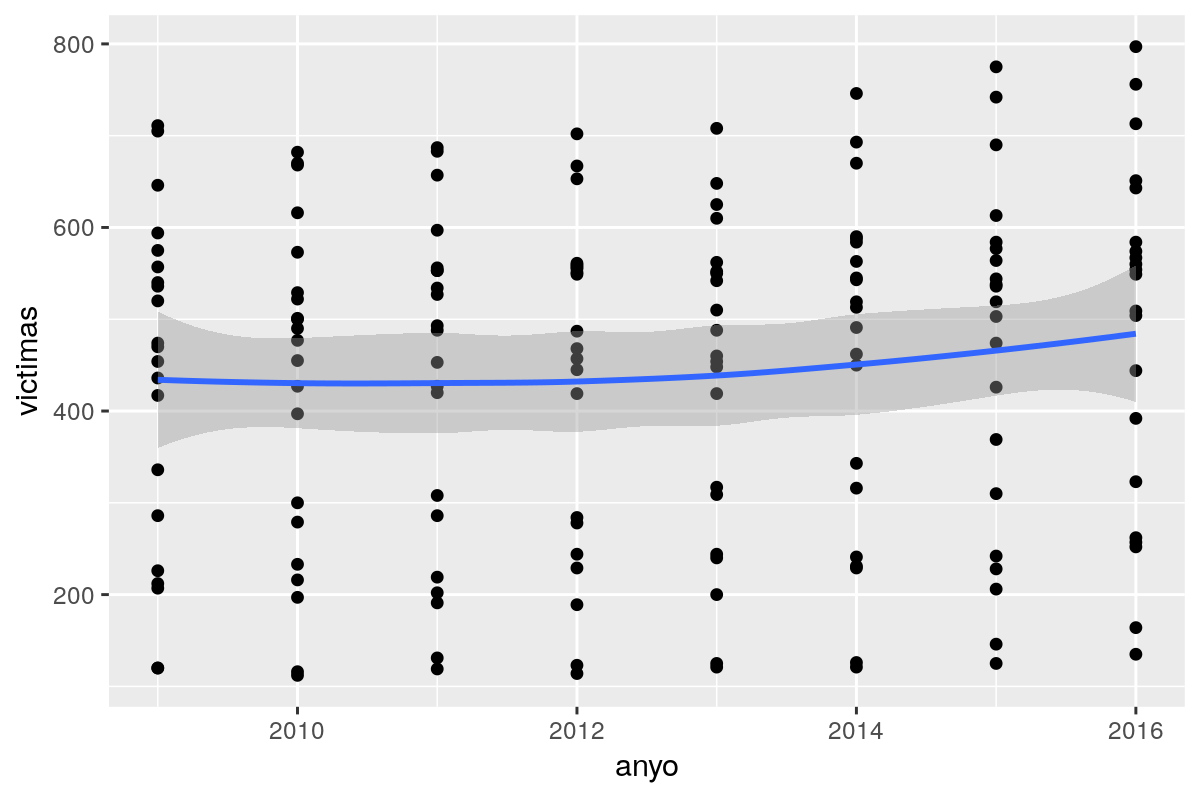

In [79]:
library(ggplot2)
ggplot(df_acc,aes(x=anyo,y=victimas))+geom_point()+geom_smooth()

### Modelo

Vamos a crear un modelo GLM basado en Poisson y otro en el tradicional Gauss. Estos modelos tratarán de predecir el número medio de victimas que hay en función del año para todos los distritos. Más adelante realizaremos una separación por distrito, pero por ahora ignoraremos la columna distrito.

Como veremos el AIC es mayor en el modelo gaussiano que en el de poisson, lo que significa que la verosimilitud (likelihood) es mayor en la del modelo de Poisson.

In [80]:
model_accidente<-glm(df_acc,formula="victimas~anyo",family=poisson)
summary(model_accidente)


Call:
glm(formula = "victimas~anyo", family = poisson, data = df_acc)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-18.694   -7.779    2.221    5.390   13.653  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -26.092504   3.211352  -8.125 4.47e-16 ***
anyo          0.015996   0.001596  10.025  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 13663  on 167  degrees of freedom
Residual deviance: 13562  on 166  degrees of freedom
AIC: 14881

Number of Fisher Scoring iterations: 4


In [81]:
model_accidente_gauss<-glm(df_acc,formula=victimas~anyo,family=gaussian)
summary(model_accidente_gauss)


Call:
glm(formula = victimas ~ anyo, family = gaussian, data = df_acc)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-338.50  -154.65    47.01   118.01   326.38  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -13897.377  12193.674  -1.140    0.256
anyo             7.127      6.059   1.176    0.241

(Dispersion parameter for gaussian family taken to be 32379.15)

    Null deviance: 5419739  on 167  degrees of freedom
Residual deviance: 5374938  on 166  degrees of freedom
AIC: 2225.5

Number of Fisher Scoring iterations: 2


In [82]:
df_acc$pred_poisson<-exp(predict(model_accidente,df_acc))
df_acc$pred_gaussian<-predict(model_accidente_gauss,df_acc)

In [83]:
confint(model_accidente)
confint(model_accidente_gauss)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-32.3870474,-19.79869517
anyo,0.0128685,0.01912332


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-37796.538893,10001.78492
anyo,-4.748368,19.00234


Si pintamos los dos modelos veremos que las líneas de la regresión son prácticamente idénticas:

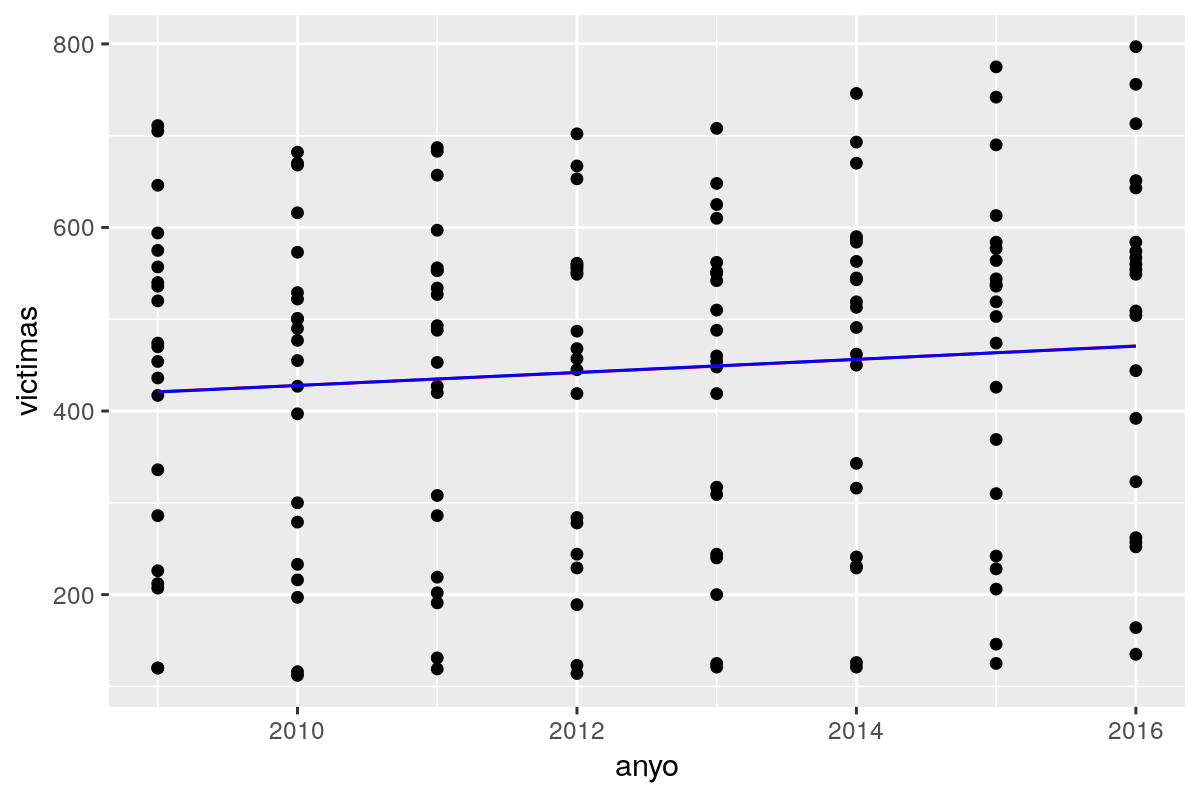

In [84]:
options(repr.plot.height=4,repr.plot.width=6)

library(ggplot2)
ggplot(df_acc,aes(x=anyo,y=victimas))+geom_point()+
geom_line(aes(y=pred_poisson),color="red")+geom_line(aes(y=pred_gaussian),color="blue")

Si comprobamos su valor estimado año a año vemos que las diferencias son mínimas. 

Si comprobamos la diferencia de un año al siguiente en la predicción gaussiana vemos como la diferencia es constante, todos los años el número de víctimas aumenta de forma lineal en 7.127, el cual se corresponde con el coeficiente. Para este caso la formula de la predicción es:
\\[
victimas= -13897.377 + anyo·7.127
\\]

En cambio en la regressión de Poission nos dice que el número medio de victimas esperado cada año en un distrito es:
\\[
victimas= exp(-26.092504 + anyo·0.015996)
\\]
lo que significa que cada año que pasa el número de victimas aumenta de forma geométrica $e^{0.015996}=1.016124$. Es decir, cada año los accidentes aumentan un 1.6%.

In [85]:
df_acc_pred<-unique(df_acc[,c("anyo","pred_poisson","pred_gaussian")])
df_acc_pred

,anyo,pred_poisson,pred_gaussian
,<dbl>,<dbl>,<dbl>
1,2009,421.1299,420.7341
22,2010,427.9204,427.8611
43,2011,434.8203,434.9881
64,2012,441.8315,442.1151
85,2013,448.9557,449.2421
106,2014,456.1949,456.3690
127,2015,463.5507,463.4960
148,2016,471.0252,470.6230


In [86]:
data.frame(diff(as.matrix(df_acc_pred)))

,anyo,pred_poisson,pred_gaussian
,<dbl>,<dbl>,<dbl>
22,1,6.790450,7.126984
43,1,6.899941,7.126984
64,1,7.011198,7.126984
85,1,7.124250,7.126984
106,1,7.239123,7.126984
127,1,7.355850,7.126984
148,1,7.474458,7.126984


In [87]:
data.frame(diff(as.matrix(log(df_acc_pred))))

,anyo,pred_poisson,pred_gaussian
,<dbl>,<dbl>,<dbl>
22,0.0004976362,0.01599574,0.01679753
43,0.0004973887,0.01599574,0.01652003
64,0.0004971414,0.01599574,0.01625155
85,0.0004968944,0.01599574,0.01599165
106,0.0004966476,0.01599574,0.01573994
127,0.0004964011,0.01599574,0.01549603
148,0.0004961548,0.01599574,0.01525956


In [88]:
head(df_acc)

,anyo,distrito,Total,victimas,pred_poisson,pred_gaussian
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,2009,ARGANZUELA,722,454,421.1299,420.7341
2,2009,BARAJAS,188,120,421.1299,420.7341
3,2009,CARABANCHEL,807,575,421.1299,420.7341
4,2009,CENTRO,981,646,421.1299,420.7341
5,2009,CHAMARTIN,908,705,421.1299,420.7341
6,2009,CHAMBERI,702,536,421.1299,420.7341


In [89]:
df_acc_t<-df_acc %>% dplyr::group_by(anyo) %>% dplyr::summarise(Total = sum(Total), victimas=sum(victimas))
head(df_acc_t)
df_acc_t$victimas<-df_acc_t$victimas/length(levels(df_acc$distrito))


model_accidente_t<-glm(df_acc_t,formula="victimas~anyo",family=poisson)
summary(model_accidente_t)

anyo,Total,victimas
<dbl>,<dbl>,<dbl>
2009,12660,9142
2010,11728,8960
2011,12003,9084
2012,11746,9091
2013,11749,9132
2014,11935,9564


Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 435.333333”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 426.666667”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 432.571429”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 432.904762”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 434.857143”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 455.428571”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 462.428571”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 485.238095”



Call:
glm(formula = "victimas~anyo", family = poisson, data = df_acc_t)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.66892  -0.18749  -0.05639   0.13599   0.68829  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept) -26.092504  14.716322  -1.773   0.0762 .
anyo          0.015996   0.007312   2.188   0.0287 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 6.3341  on 7  degrees of freedom
Residual deviance: 1.5467  on 6  degrees of freedom
AIC: Inf

Number of Fisher Scoring iterations: 3


Podemos mirar como cambia por distrito. 

Si nos fijamos, la pendiente será la misma, pero cada distrito tiene un valor muy diferente. El modelo que hemos analizado es:
\\[
victimas= exp(-26.027735 + anyo·0.015996+\Delta_{distrito})
\\]
Donde $\Delta_{distrito}$ es el incremento (o decremento) respecto al distrito base, el de ARGANZUELA.

Así el distrito de Chamartín tiene un 46% ($e^{0.382419}=1.46$) más de accidentes que el distrito de Arganuzela.

Si queremos comparar cuantos accidentes hay en Moncloa-Aravaca respecto a Chamartin solo tenemos que restar sus coeficientes: $e^{0.135960-0.382419}=e^{-0.246458}=0.78$.


In [90]:
model_accidente<-glm(df_acc,formula="victimas~distrito+anyo",family=poisson)
summary(model_accidente)


Call:
glm(formula = "victimas~distrito+anyo", family = poisson, data = df_acc)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.61609  -0.64285   0.05374   0.58056   2.45767  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -26.027735   3.211402  -8.105 5.28e-16 ***
distritoBARAJAS              -1.298757   0.035018 -37.088  < 2e-16 ***
distritoCARABANCHEL           0.165354   0.022039   7.503 6.24e-14 ***
distritoCENTRO                0.352381   0.021159  16.654  < 2e-16 ***
distritoCHAMARTIN             0.382419   0.021029  18.185  < 2e-16 ***
distritoCHAMBERI              0.156851   0.022082   7.103 1.22e-12 ***
distritoCIUDAD LINEAL         0.237965   0.021682  10.975  < 2e-16 ***
distritoFUENCARRAL-EL PARDO   0.126044   0.022240   5.667 1.45e-08 ***
distritoHORTALEZA            -0.375172   0.025405 -14.767  < 2e-16 ***
distritoLATINA               -0.052345   0.023236  -2.253  0.02427 *  


In [91]:
df_acc = df_acc %>% mutate(distrito_relevel = relevel(distrito, ref="CHAMARTIN"))

model_accidente<-glm(df_acc,formula=victimas~anyo+distrito_relevel,family=poisson)

summary(model_accidente)


Call:
glm(formula = victimas ~ anyo + distrito_relevel, family = poisson, 
    data = df_acc)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.61609  -0.64285   0.05374   0.58056   2.45767  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -25.645317   3.211389  -7.986 1.40e-15 ***
anyo                                  0.015996   0.001596  10.025  < 2e-16 ***
distrito_relevelARGANZUELA           -0.382419   0.021029 -18.185  < 2e-16 ***
distrito_relevelBARAJAS              -1.681176   0.033804 -49.733  < 2e-16 ***
distrito_relevelCARABANCHEL          -0.217065   0.020054 -10.824  < 2e-16 ***
distrito_relevelCENTRO               -0.030038   0.019083  -1.574    0.115    
distrito_relevelCHAMBERI             -0.225568   0.020101 -11.222  < 2e-16 ***
distrito_relevelCIUDAD LINEAL        -0.144454   0.019661  -7.347 2.02e-13 ***
distrito_relevelFUENCARRAL-EL PARDO  -0.256374   0.0202

Otra opción es ver si en algún distrito está disminuyendo el número de accidentes año tras año.
Para ello usamos la formula:
\\[
victimas= exp(-25.69 + anyo·0.01583+\Delta_{distrito}+\Delta_{distrito_anyo}·anyo)
\\]
Donde $\Delta_{distrito}$ es el incremento (o decremento) respecto al distrito base, el de ARGANZUELA y 
$\Delta_{distrito_anyo}$ es cuanto aumenta cada año respecto al base de ARGANZUELA.

In [92]:
model_accidente<-glm(df_acc,formula="victimas~distrito*anyo",family=poisson)
summary(model_accidente)


Call:
glm(formula = "victimas~distrito*anyo", family = poisson, data = df_acc)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.39691  -0.56272   0.02235   0.53965   2.78952  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)                      -2.569e+01  1.425e+01  -1.803   0.0714 .
distritoBARAJAS                  -5.195e+01  3.083e+01  -1.685   0.0919 .
distritoCARABANCHEL               1.741e+01  1.936e+01   0.899   0.3685  
distritoCENTRO                    1.393e-01  1.859e+01   0.007   0.9940  
distritoCHAMARTIN                 5.900e+00  1.848e+01   0.319   0.7495  
distritoCHAMBERI                  1.452e+01  1.940e+01   0.748   0.4542  
distritoCIUDAD LINEAL             1.581e+01  1.905e+01   0.830   0.4067  
distritoFUENCARRAL-EL PARDO       1.633e+00  1.954e+01   0.084   0.9334  
distritoHORTALEZA                -4.033e+01  2.235e+01  -1.805   0.0711 .
distritoLATINA                   -8.086e-

Así por ejemplo para el distrito de MONCLOA-ARAVACA, tenemos:
\\[
victimas= exp(-25.69 + anyo·0.01583+39.11-0.01937·anyo)
\\]


In [93]:
df_moncloa<-data.frame(distrito="MONCLOA-ARAVACA",anyo=2009:2016)
df_moncloa$pred<-exp(predict(model_accidente,df_moncloa))
df_moncloa<-merge(df_moncloa,df_acc[,c("anyo","distrito","victimas")],by=c("anyo","distrito"))
df_moncloa

anyo,distrito,pred,victimas
<int>,<fct>,<dbl>,<dbl>
2009,MONCLOA-ARAVACA,551.5239,540
2010,MONCLOA-ARAVACA,549.5748,573
2011,MONCLOA-ARAVACA,547.6326,534
2012,MONCLOA-ARAVACA,545.6972,555
2013,MONCLOA-ARAVACA,543.7687,550
2014,MONCLOA-ARAVACA,541.8469,519
2015,MONCLOA-ARAVACA,539.9320,538
2016,MONCLOA-ARAVACA,538.0239,549


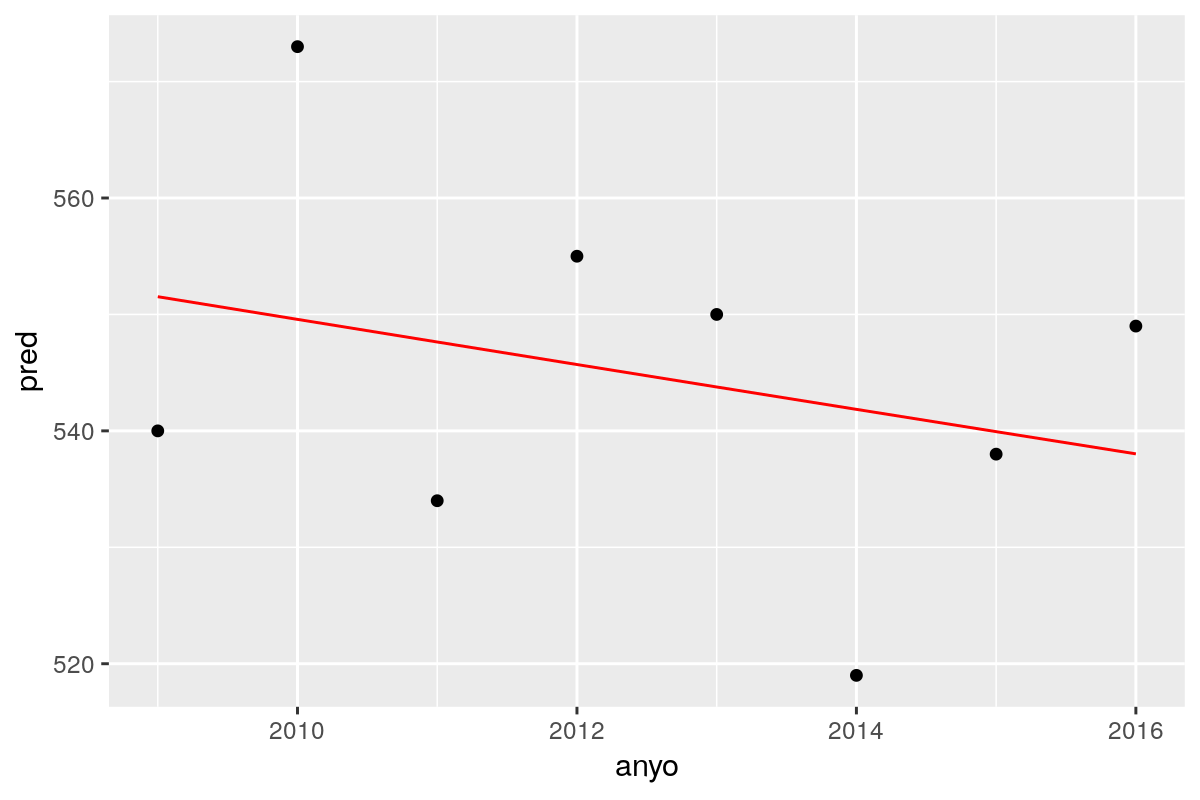

In [94]:
ggplot(df_moncloa,aes(x=anyo))+geom_line(aes(y=pred),color="red")+geom_point(aes(y=victimas))

In [95]:
cnf<-confint(model_accidente)
cnf[c("(Intercept)","anyo","distritoMONCLOA-ARAVACA","distritoMONCLOA-ARAVACA:anyo"),]

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-53.621312708,2.2297912335
anyo,0.001955072,0.0297060102
distritoMONCLOA-ARAVACA,0.909891037,77.3261986673
distritoMONCLOA-ARAVACA:anyo,-0.038354706,-0.0003845687


In [96]:
df_acc = df_acc %>% mutate(distrito_relevel = relevel(distrito, ref="MONCLOA-ARAVACA"))
model_accidente<-glm(df_acc,formula=victimas~anyo*distrito_relevel,family=poisson)
summary(model_accidente)
cnf<-confint(model_accidente)
cnf[c("(Intercept)","anyo"),]


Call:
glm(formula = victimas ~ anyo * distrito_relevel, family = poisson, 
    data = df_acc)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.39691  -0.56272   0.02235   0.53965   2.78952  

Coefficients:
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                               13.425219  13.305087   1.009 0.312961
anyo                                      -0.003540   0.006611  -0.535 0.592305
distrito_relevelARGANZUELA               -39.113823  19.493829  -2.006 0.044806
distrito_relevelBARAJAS                  -91.067733  30.404986  -2.995 0.002743
distrito_relevelCARABANCHEL              -21.702085  18.680338  -1.162 0.245333
distrito_relevelCENTRO                   -38.974566  17.880918  -2.180 0.029282
distrito_relevelCHAMARTIN                -33.213872  17.761340  -1.870 0.061483
distrito_relevelCHAMBERI                 -24.592521  18.719973  -1.314 0.188946
distrito_relevelCIUDAD LINEAL            -23.3

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-12.65260879,39.504759448
anyo,-0.01649944,0.009417483


# COVID-19

In [97]:
library(tidyverse)
#df_acumulados<-read.csv("https://covid19.isciii.es/resources/serie_historica_acumulados.csv")
df_acumulados<-read.csv("data/serie_historica_acumulados.csv")
df_acumulados$FECHA<-as.Date(df_acumulados$FECHA,format="%d/%m/%Y")
head(df_acumulados)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ plyr::arrange()   masks dplyr::arrange()
✖ purrr::compact()  masks plyr::compact()
✖ plyr::count()     masks dplyr::count()
✖ plyr::failwith()  masks dplyr::failwith()
✖ dplyr::filter()   masks stats::filter()
✖ plyr::id()        masks dplyr::id()
✖ dplyr::lag()      masks stats::lag()
✖ plyr::mutate()    masks dplyr::mutate()
✖ plyr::rename()    masks dplyr::rename()
✖ plyr::summarise() masks dplyr::summarise()
✖ plyr::summarize() masks dplyr::summarize()



,CCAA,FECHA,CASOS,PCR.,TestAc.,Hospitalizados,UCI,Fallecidos,Recuperados
,<fct>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,AN,2020-02-20,NA,NA,NA,NA,NA,NA,NA
2,AR,2020-02-20,NA,NA,NA,NA,NA,NA,NA
3,AS,2020-02-20,NA,NA,NA,NA,NA,NA,NA
4,IB,2020-02-20,1,NA,NA,NA,NA,NA,NA
5,CN,2020-02-20,1,NA,NA,NA,NA,NA,NA
6,CB,2020-02-20,NA,NA,NA,NA,NA,NA,NA


In [98]:
df_acumulados_all<-df_acumulados %>% group_by(FECHA) %>% 
    summarise_at(c("CASOS","Hospitalizados","UCI","Fallecidos","Recuperados"), sum, na.rm = TRUE)

Warning message:
“Removed 1 rows containing missing values (geom_path).”


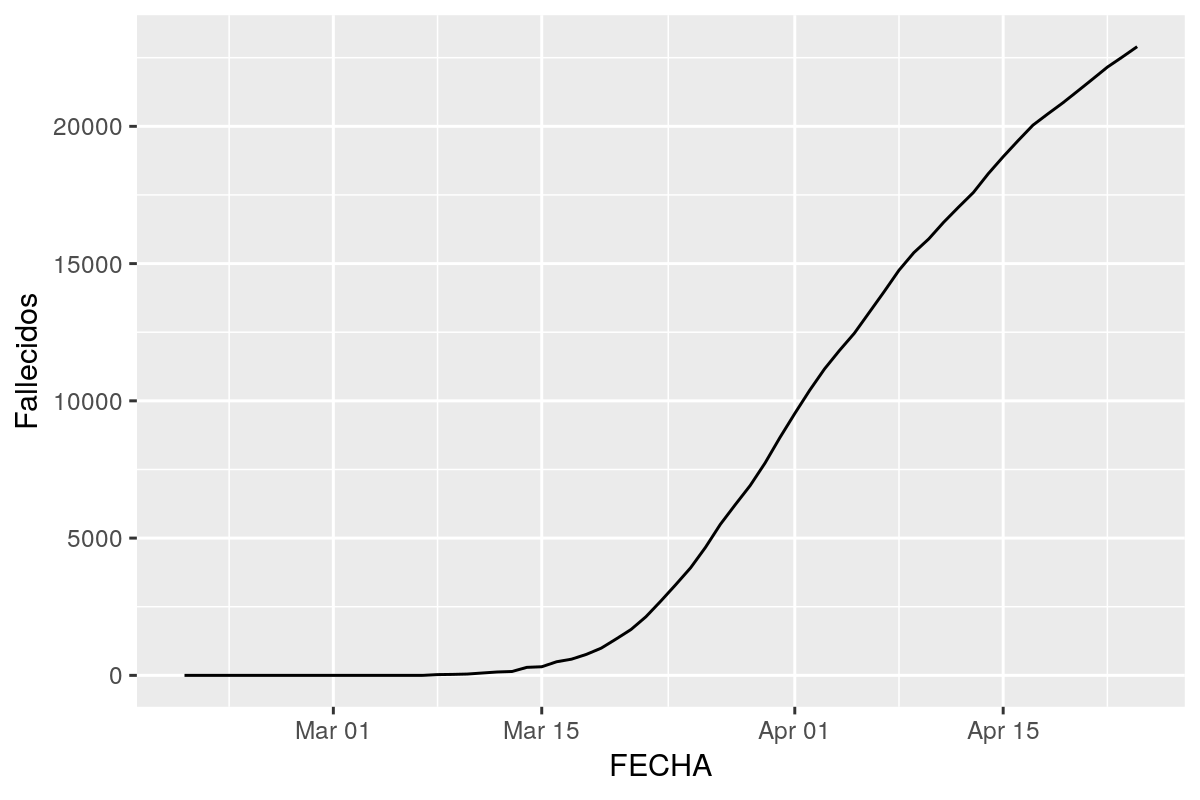

In [99]:
ggplot(df_acumulados_all,aes(x=FECHA,y=Fallecidos))+geom_line()

In [100]:
df_acumulados<-df_acumulados %>% filter(FECHA<as.Date("2020-04-01"))
df_acumulados_all<-df_acumulados_all %>% filter(FECHA<as.Date("2020-04-01"))
df_acumulados_all$Fallecidos_dia<-c(NA,diff(df_acumulados_all$Fallecidos))
df_acumulados_all$dia<-seq(nrow(df_acumulados_all))

In [101]:
tail(df_acumulados_all)

FECHA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados,Fallecidos_dia,dia
<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2020-03-26,64059,35820,4023,4663,8491,745,36
2020-03-27,72248,40181,4353,5502,10896,839,37
2020-03-28,78796,42807,4662,6217,13219,715,38
2020-03-29,85142,45717,4926,6913,14823,696,39
2020-03-30,94164,48144,5233,7733,16926,820,40
2020-03-31,102136,51218,5517,8662,20023,929,41


In [102]:
model_poisson<-glm(df_acumulados_all,formula=Fallecidos_dia~dia,family=poisson)
summary(model_poisson)


Call:
glm(formula = Fallecidos_dia ~ dia, family = poisson, data = df_acumulados_all)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-9.994  -5.809  -3.305   3.222  10.331  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 0.669573   0.063057   10.62   <2e-16 ***
dia         0.157938   0.001764   89.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 16183.3  on 39  degrees of freedom
Residual deviance:  1362.4  on 38  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 1534

Number of Fisher Scoring iterations: 5


In [103]:
paste("Cada día las vícimas
se multiplican por",exp(model_poisson$coefficients[2]))

[1] "Cada día las vícimas\nse multiplican por 1.17109336753171"

Warning message:
“Removed 1 rows containing missing values (geom_path).”


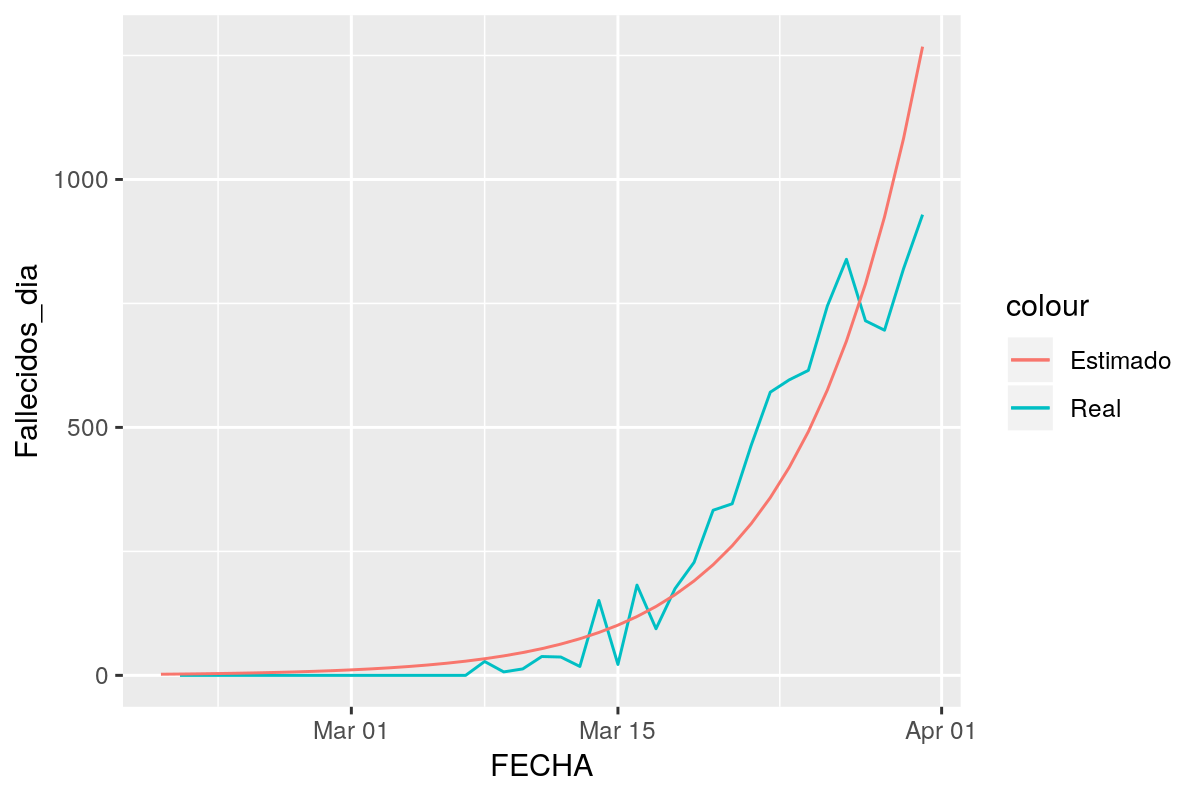

In [104]:
preds<-df_acumulados_all[,c("Fallecidos_dia","dia","FECHA")]
preds$pred<-predict(model_poisson,preds,type="response")
preds$pred_manual<-exp(model_poisson$coefficients[2]*preds$dia+model_poisson$coefficients[1])
ggplot(preds,aes(x=FECHA))+
    geom_line(aes(y=Fallecidos_dia,color="Real"))+
    geom_line(aes(y=pred,color="Estimado"))

In [105]:
df_acumulados_all$log_fallecidos<-log(df_acumulados_all$Fallecidos_dia)
df_acumulados_all_no_inf<-df_acumulados_all[!is.infinite(df_acumulados_all$log_fallecidos),]

model<-lm(data=df_acumulados_all_no_inf,
           formula=log_fallecidos~dia)
summary(model)


Call:
lm(formula = log_fallecidos ~ dia, data = df_acumulados_all_no_inf)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1408 -0.5256  0.1635  0.4248  0.9876 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.82102    0.54256  -1.513    0.144    
dia          0.20211    0.01791  11.288 1.28e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6072 on 22 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8528,	Adjusted R-squared:  0.8461 
F-statistic: 127.4 on 1 and 22 DF,  p-value: 1.275e-10


Warning message:
“Removed 1 rows containing missing values (geom_path).”


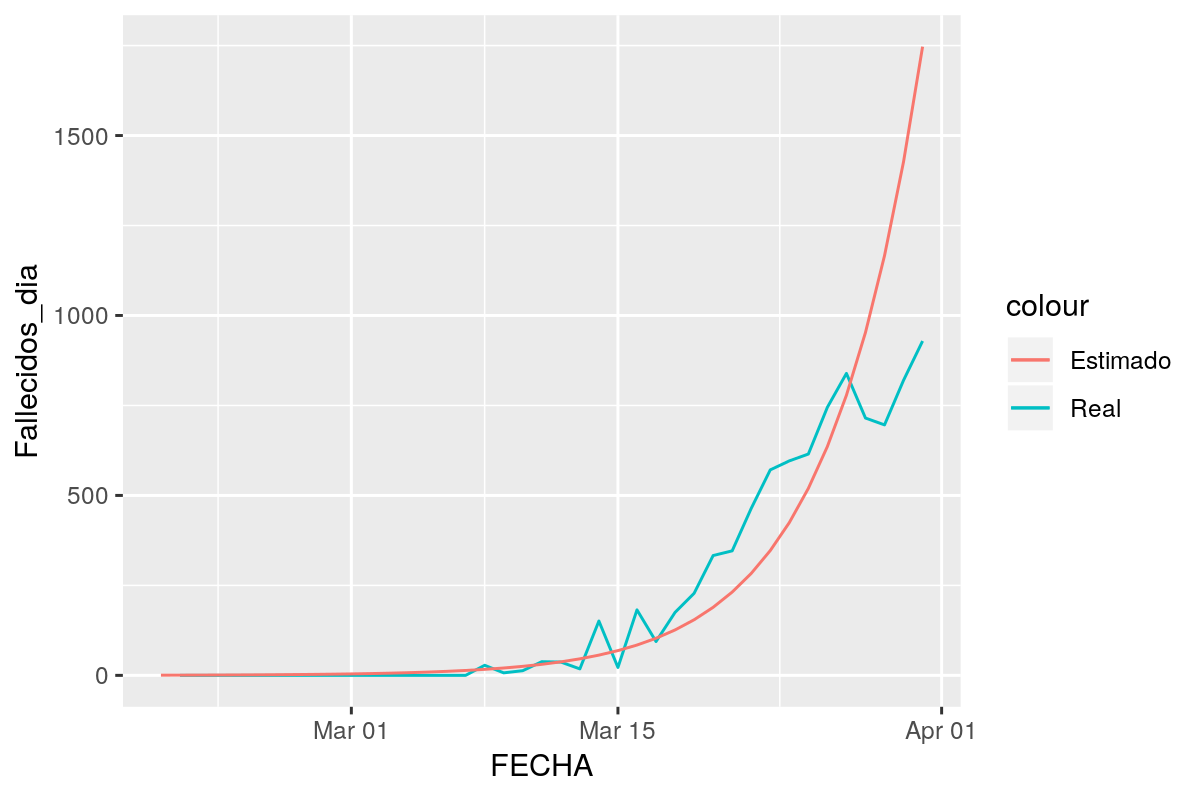

In [106]:
preds<-df_acumulados_all[,c("Fallecidos_dia","log_fallecidos","dia","FECHA")]
preds$pred<-predict(model,preds)
preds$pred_fallecidos<-exp(preds$pred)
ggplot(preds,aes(x=FECHA))+
    geom_line(aes(y=Fallecidos_dia,color="Real"))+
    geom_line(aes(y=pred_fallecidos,color="Estimado"))